# E-commerce Customer Churn
by: Muhammad Ichsan Lukita

---
# Backgrounds:
An E-commerce aims to adjust the strategy for customer churn that occurs. Analysis is needed to identify the most likely customer tendencies to leave the service within the platform.

In order to preserve revenue health within the organization besides getting customers retaining existing customers from churning is very important for the company.
<br><br>
Therefore an analytical approach with Machine Learning is considered as the suitable forecasting approaches in presenting insights to find pattern based on predictions and recommendations on the business strategy


---
# Problem Statement:
- What factors can influence customer churn?
- What business strategies can companies implement to reduce churn rates and retain customers?

---
# Objective:
- Finding potential dependent factors on customer churn
- Provide measurable predictive results as recommendations for strategic steps,
in order to provide promotions that are right on target to maintain customer loyalty


---
# Analytical Approach:

The Machine Learning development in this project is rely on an analytical approach of a binary classification model to predict whether a customer will churn or not. The steps involved in this approach are as follows:

- **Data Preparation**: Acquiring and cleaning the data from various sources such as customer transactions, demographic information, and call center logs.
<br>
<br>
- **Feature Selection**: Selecting the relevant features that are likely to influence the customer churn.
<br>
<br>
- **Model Selection**: Selecting a suitable machine learning algorithm such as logistic regression, decision trees, or random forests. The selection process involves comparing the performance of different algorithms on a subset of the data.
<br>
<br>
- **Model Training**: Using the selected algorithm to train the model on the prepared data. The model is trained by adjusting the parameters so that it can accurately predict the target variable (churn or not churn).
<br>
<br>
- **Model Evaluation**: Evaluating the performance of the model using metrics such as accuracy, precision, and recall. The model may need to be fine-tuned by adjusting the parameters to achieve better performance.
<br>
<br>
- **Deployment**: Deploying the model in a production environment to make real-time predictions. The model may need to be retrained periodically as new data becomes available.

###  Matrix Evaluation

![Alt text](Datasets%20for%20Students/Confusion%20Matrix.png)

Target:
- 0 : Customers Do Not churn
- 1 : Churn Customer

Type 1 error : False Positive
Consequences: Expense costs for customers that are not churn.

Type 2 errors : False Negatives
Consequence: Loss of loyal customers

Based on the consequences, the right step for selecting a model is a model that reduces the loss of loyal customers, but still pays attention to marketing costs for customers who are not churn. The metric to be used is F score beta=2. It is defined as the harmonic mean of precision and recall,

In [146]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Data splitting dan cross validation
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold


# Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import category_encoders as ce
from category_encoders import BinaryEncoder, OrdinalEncoder # untuk ordinal dan binary encoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PolynomialFeatures, KBinsDiscretizer
from sklearn.impute import KNNImputer

# Feature Engineering
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV,StratifiedKFold,train_test_split, cross_val_score

# ML algorithm (classification)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier
import statsmodels.api as sm 

# Metric
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, fbeta_score, make_scorer
from sklearn.metrics import roc_curve, roc_auc_score

# Resampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

# Various Type
from sklearn.ensemble import VotingClassifier, StackingClassifier

# Similar Type
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier # bagging
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier # boosting


import warnings
warnings.filterwarnings('ignore')

In [147]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [148]:
sns.set_style('whitegrid')

### Context
The data set belongs to a leading online E-commerce company. An online retail (E-commerce) company wants to know the customers who are going to churn, so accordingly, they can approach customers to offer some promos.


| Attribute | Data Type | Description | Variable Type  |
| --- | --- | --- | --- |
| Tenure | Float | Tenure of a customer in the company | Quant. Kontinu |
| Warehouse to Home | Float | Distance between the warehouse to the customer’s home | Quant. Kontinu |
| Number of Device | Int | Total number of deceives is registered on a particular customer | Quant. Diskrit |
| Prefered Order Cat | Object | Preferred order category of a customer in the last month | Qual. (Nominal) |
| Satisfaction Score | Int | Satisfactory score of a customer on service | Qual. (Ordinal) |
| Marital | Object | Marital status of a customer | Qual. (Nominal) |
| Number of Address | Int | Total number of added on a particular customer | Quant. Diskrit |  
| Complain | Int | Complaint has been raised in the last month | Qual. (Nominal)|
| Day Since Last Order | Float | Day since last order by customer | Quant. Kontinu |
| Cashback Amount | Float | Average cashback in last month | Quant. Kontinu |
| Churn | Int | Churn flag | Qual. (Nominal) | 

Score Weighting: 
- Documentation & Video :25
- Business Problem & Data Understanding :10
- Data Cleaning, Feature selection, & Feature Engineering :15
- Analytics (Algorithm, Evaluation Metrics) :40
- Conclusion and Recommendation/Improvement :10

---
# Load Dataset

In [150]:
df = pd.read_csv('/Users/ichsanlukita/Documents/Purwadhika - Data Science/Python/Capstone Modul 3/Datasets for Students/Classification/E-commerce Customer Churn/data_ecommerce_customer_churn.csv')
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [151]:
# Checking data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [152]:
# Check statistical overview summary for numerical(integer) data type
df.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


In [153]:
# Check statistical overview summary for object(string) data type
df.describe(include=object)

,PreferedOrderCat,MaritalStatus
count,3941,3941
unique,6,3
top,Laptop & Accessory,Married
freq,1458,2055


In [154]:
# Check data indicating as blank cell (null)
df.isnull().sum()

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64

In [155]:
# Check duplicated data 
df.duplicated().sum()

671

In [156]:
df.shape

(3941, 11)

# Data Cleaning
At this stage we will elimate the missing value, duplicated data, and error typing to prepared data ready for further analysis and modelling process

In [157]:
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [158]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), df[col].unique()]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Tenure,float64,194,4.92,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,..."
1,WarehouseToHome,float64,169,4.29,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
2,NumberOfDeviceRegistered,int64,0,0.00,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,object,0,0.00,6,"[Laptop & Accessory, Mobile, Fashion, Others, ..."
4,SatisfactionScore,int64,0,0.00,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,object,0,0.00,3,"[Single, Married, Divorced]"
6,NumberOfAddress,int64,0,0.00,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,int64,0,0.00,2,"[0, 1]"
8,DaySinceLastOrder,float64,213,5.40,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,..."
9,CashbackAmount,float64,0,0.00,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8..."


Since the existing features in dataset consider as relevant, therefore the entire column will remain.

<br>
Pada kolom NumberOfDeviceRegistered kita melihat apakah user dengan multiple device akan memiliki pengaruh kecenderungan akan churn, dengan asumsi salah satu akun user akan lebih aktif dari device lainnya

In [159]:
# Data pada tenure dari hasil observasi tipe datanya cukup menarik. Dimana unit of measure for tenure seringkali berupa days, weeks, months, and years.
# Dilihat dari pola datanya, tenure disini dalam satuan hari. 
# Sehingga data ini seharusnya bersifat integer


df['Tenure'].min()
df['Tenure'].max()
df['Tenure'].nunique()
df['Tenure'].unique()

array([15.,  7., 27., 20., 30.,  1., 11., 17.,  6., 16., 10., nan,  8.,
       19.,  0.,  3.,  5.,  9., 18., 12., 24.,  4., 61., 25., 13., 14.,
        2., 21., 29., 26., 23., 31., 22., 28., 51., 60., 50.])

In [160]:
# Diilihat dari pola data, 'WarehouseToHome' adalah dalam bentuk kilometer. Namun karena float disini bilangannya 0 setelah koma, maka bisa dipertimbangkan untuk diubah ke integer jika perlu.
df['WarehouseToHome'].unique()

array([ 29.,  25.,  13.,  15.,  16.,  11.,  12.,   7.,  26.,  20.,  14.,
         8.,  21.,  22.,  27.,  18.,  33.,   9.,  17.,  nan,   6.,  31.,
        28.,  10.,  19.,  32.,  23.,  30.,  35.,  34.,  24.,   5.,  36.,
       127.])

In [161]:
# Diilihat dari pola data, 'DaySinceLastOrder' adalah dalam bentuk hari. Namun karena float disini bilangannya 0 setelah koma, maka bisa dipertimbangkan untuk diubah ke integer jika perlu.

df['DaySinceLastOrder'].unique()

array([ 7., nan,  8., 11.,  2.,  1.,  4.,  3.,  6.,  0., 14.,  9., 10.,
       12.,  5., 17., 30., 18., 16., 13., 15., 46., 31.])

In [162]:
df['CashbackAmount'].unique()

array([143.32, 129.29, 168.54, ..., 147.66, 231.86, 153.73])

In [163]:
# Menghitung Jumlah per Kategori
df['PreferedOrderCat'].value_counts()

Laptop & Accessory    1458
Mobile Phone           887
Fashion                585
Mobile                 559
Grocery                273
Others                 179
Name: PreferedOrderCat, dtype: int64

In [164]:
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')
df['PreferedOrderCat'].value_counts()

# Since Mobile and Mobile Phone having the same meaning, therefore we to unify the terms only to 'Mobile Phone' 

Laptop & Accessory    1458
Mobile Phone          1446
Fashion                585
Grocery                273
Others                 179
Name: PreferedOrderCat, dtype: int64

In [165]:
df['MaritalStatus'].value_counts()

Married     2055
Single      1310
Divorced     576
Name: MaritalStatus, dtype: int64

In [166]:
df['Complain'].value_counts()

0    2828
1    1113
Name: Complain, dtype: int64

### Duplicated data

In [167]:
df.duplicated().sum()

672

In [168]:
len(df)

3941

In [169]:
df.shape

(3941, 11)

In [170]:
duplicate = df.duplicated().sum()
duplicate_pct = round(df.duplicated().sum()/len(df)* 100, 2)
print(f'Duplicated Data: {duplicate}, Percentage of Duplicated Data: {duplicate_pct}% from Overal DataFrame Row')

Duplicated Data: 672, Percentage of Duplicated Data: 17.05% from Overal DataFrame Row


Based on EDA there are 672 duplicate data from 3941 rows with a percentage of 17.05% of all row data. To prevent the information leakage of a machine learning model in which they accidentally share information between the test and training data-sets. The duplicated data must be removed because it can affect the performance of the machine learning model created [(Reference)](https://towardsdatascience.com/data-leakage-in-machine-learning-10bdd3eec742).  

In [171]:
# Reomve all duplicated data

df.drop_duplicates(inplace=True)
print(f'Data shape after duplicated value removed: {df.shape}, Sisa Data Duplikat: {df.duplicated().sum()}')


Data shape after duplicated value removed: (3269, 11), Sisa Data Duplikat: 0


### Missing Value

In [172]:
df.isna().sum().sum()

475

In [173]:
df[df.isnull().any(axis=1)].shape[0]

475

In [174]:
len(df[df.isna()])

3269

In [175]:
len(df)

3269

In [176]:
# CARI CARA LAIN HITUNG TOTAL MISSING ROW

print(f'''
Total of Missing Values: {df.isna().sum().sum()}
Total row with Missing Values: {df[df.isnull().any(axis=1)].shape[0]}
Percentage row with Missing Values: {round(df.isna().sum().sum()/len(df)*100, 2)}% 
''')


Total of Missing Values: 475
Total row with Missing Values: 475
Percentage row with Missing Values: 14.53% 



Since we identified the number of missing values is quite large, which is 14.53% of rows containing missing values.  Therefore the rows will not be dropped because it can reduce the amount of known data and information. 
<br><br>
All the missing values above are numeric data in float type with continuous type. For further step we will analyze whether the characteristic of missing value.

### Data Category, Distributions & Outliers

In [177]:
df.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3110.000000,3134.000000,3269.000000,3269.000000,3269.000000,3269.000000,3088.000000,3269.000000,3269.000000
mean,10.190354,15.510849,3.676660,3.020801,4.223616,0.281738,4.546956,177.435528,0.163047
std,8.650821,8.569707,1.017477,1.395326,2.623308,0.449915,3.695715,49.307614,0.369465
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.900000,0.000000
50%,9.000000,13.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.890000,0.000000
75%,16.000000,20.000000,4.000000,4.000000,6.000000,1.000000,7.000000,197.140000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


In [178]:
cat_features = [feature for feature in df.columns if (df[feature].dtypes == 'O')]
cat_features

['PreferedOrderCat', 'MaritalStatus']

In [179]:
for i in cat_features:
    print(f'Total unique values in {i}: ', df[i].nunique())
    print(f'Unique values: ', df[i].unique())
    print()


Total unique values in PreferedOrderCat:  5
Unique values:  ['Laptop & Accessory' 'Mobile Phone' 'Fashion' 'Others' 'Grocery']

Total unique values in MaritalStatus:  3
Unique values:  ['Single' 'Married' 'Divorced']



In [180]:
for i in cat_features:
    print(df[i].value_counts())
    print()

Laptop & Accessory    1213
Mobile Phone          1182
Fashion                484
Grocery                241
Others                 149
Name: PreferedOrderCat, dtype: int64

Married     1686
Single      1007
Divorced     576
Name: MaritalStatus, dtype: int64



In [181]:
num_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['OUTCOME']))]
num_features

['Tenure',
 'WarehouseToHome',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'DaySinceLastOrder',
 'CashbackAmount',
 'Churn']

In [182]:
for i in num_features:
    print(f'Total unique values in {i}: ', df[i].nunique())
    print(f'Unique values: ', df[i].unique())
    print()


Total unique values in Tenure:  36
Unique values:  [15.  7. 27. 20. 30.  1. 11. 17.  6. 16. 10. nan  8. 19.  0.  3.  5.  9.
 18. 12. 24.  4. 61. 25. 13. 14.  2. 21. 29. 26. 23. 31. 22. 28. 51. 60.
 50.]

Total unique values in WarehouseToHome:  33
Unique values:  [ 29.  25.  13.  15.  16.  11.  12.   7.  26.  20.  14.   8.  21.  22.
  27.  18.  33.   9.  17.  nan   6.  31.  28.  10.  19.  32.  23.  30.
  35.  34.  24.   5.  36. 127.]

Total unique values in NumberOfDeviceRegistered:  6
Unique values:  [4 3 6 2 5 1]

Total unique values in SatisfactionScore:  5
Unique values:  [3 1 4 2 5]

Total unique values in NumberOfAddress:  14
Unique values:  [ 2  5  7  8  3  1  9  4 10 11  6 19 22 21]

Total unique values in Complain:  2
Unique values:  [0 1]

Total unique values in DaySinceLastOrder:  22
Unique values:  [ 7. nan  8. 11.  2.  1.  4.  3.  6.  0. 14.  9. 10. 12.  5. 17. 30. 18.
 16. 13. 15. 46. 31.]

Total unique values in CashbackAmount:  2335
Unique values:  [143.32 129.29 168.54

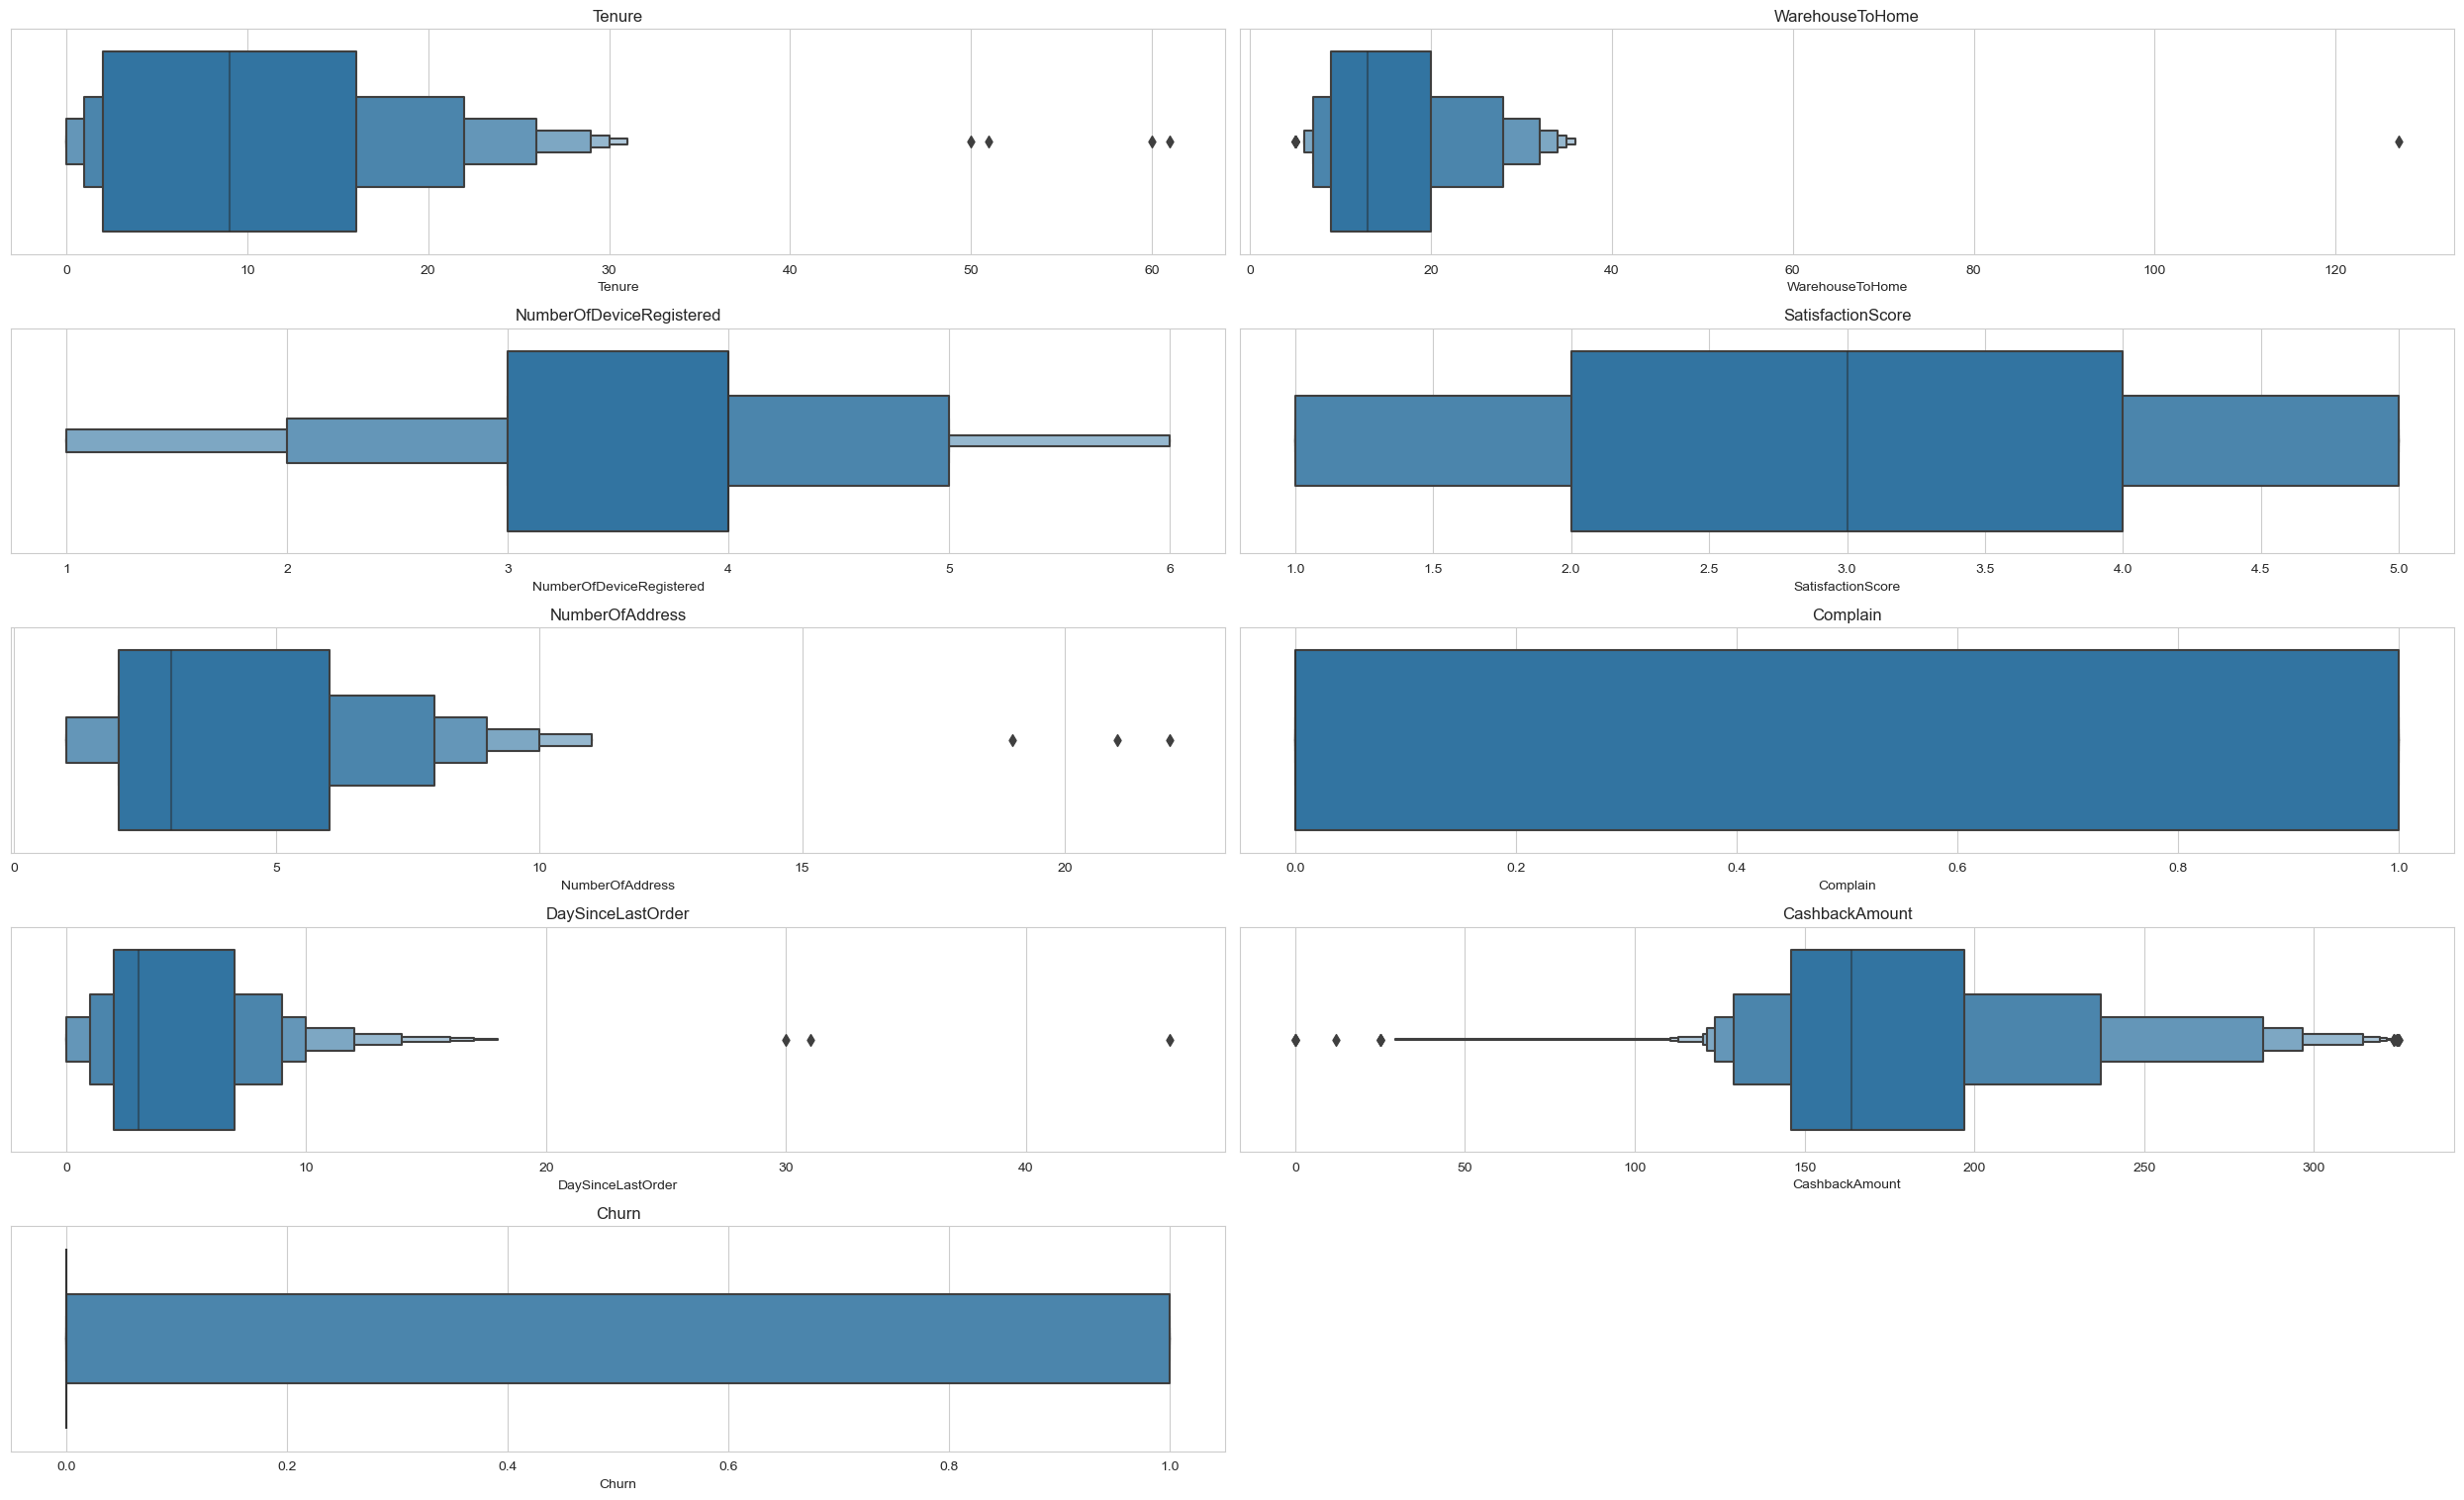

In [183]:
col_names = num_features
plotnumber = 1
plt.figure(figsize=(25,30))

for kolom in col_names:
    plt.subplot(10,2, plotnumber)
    sns.boxenplot(data=df, x=kolom)
    plt.title(kolom)
    plt.tight_layout()

    plotnumber += 1


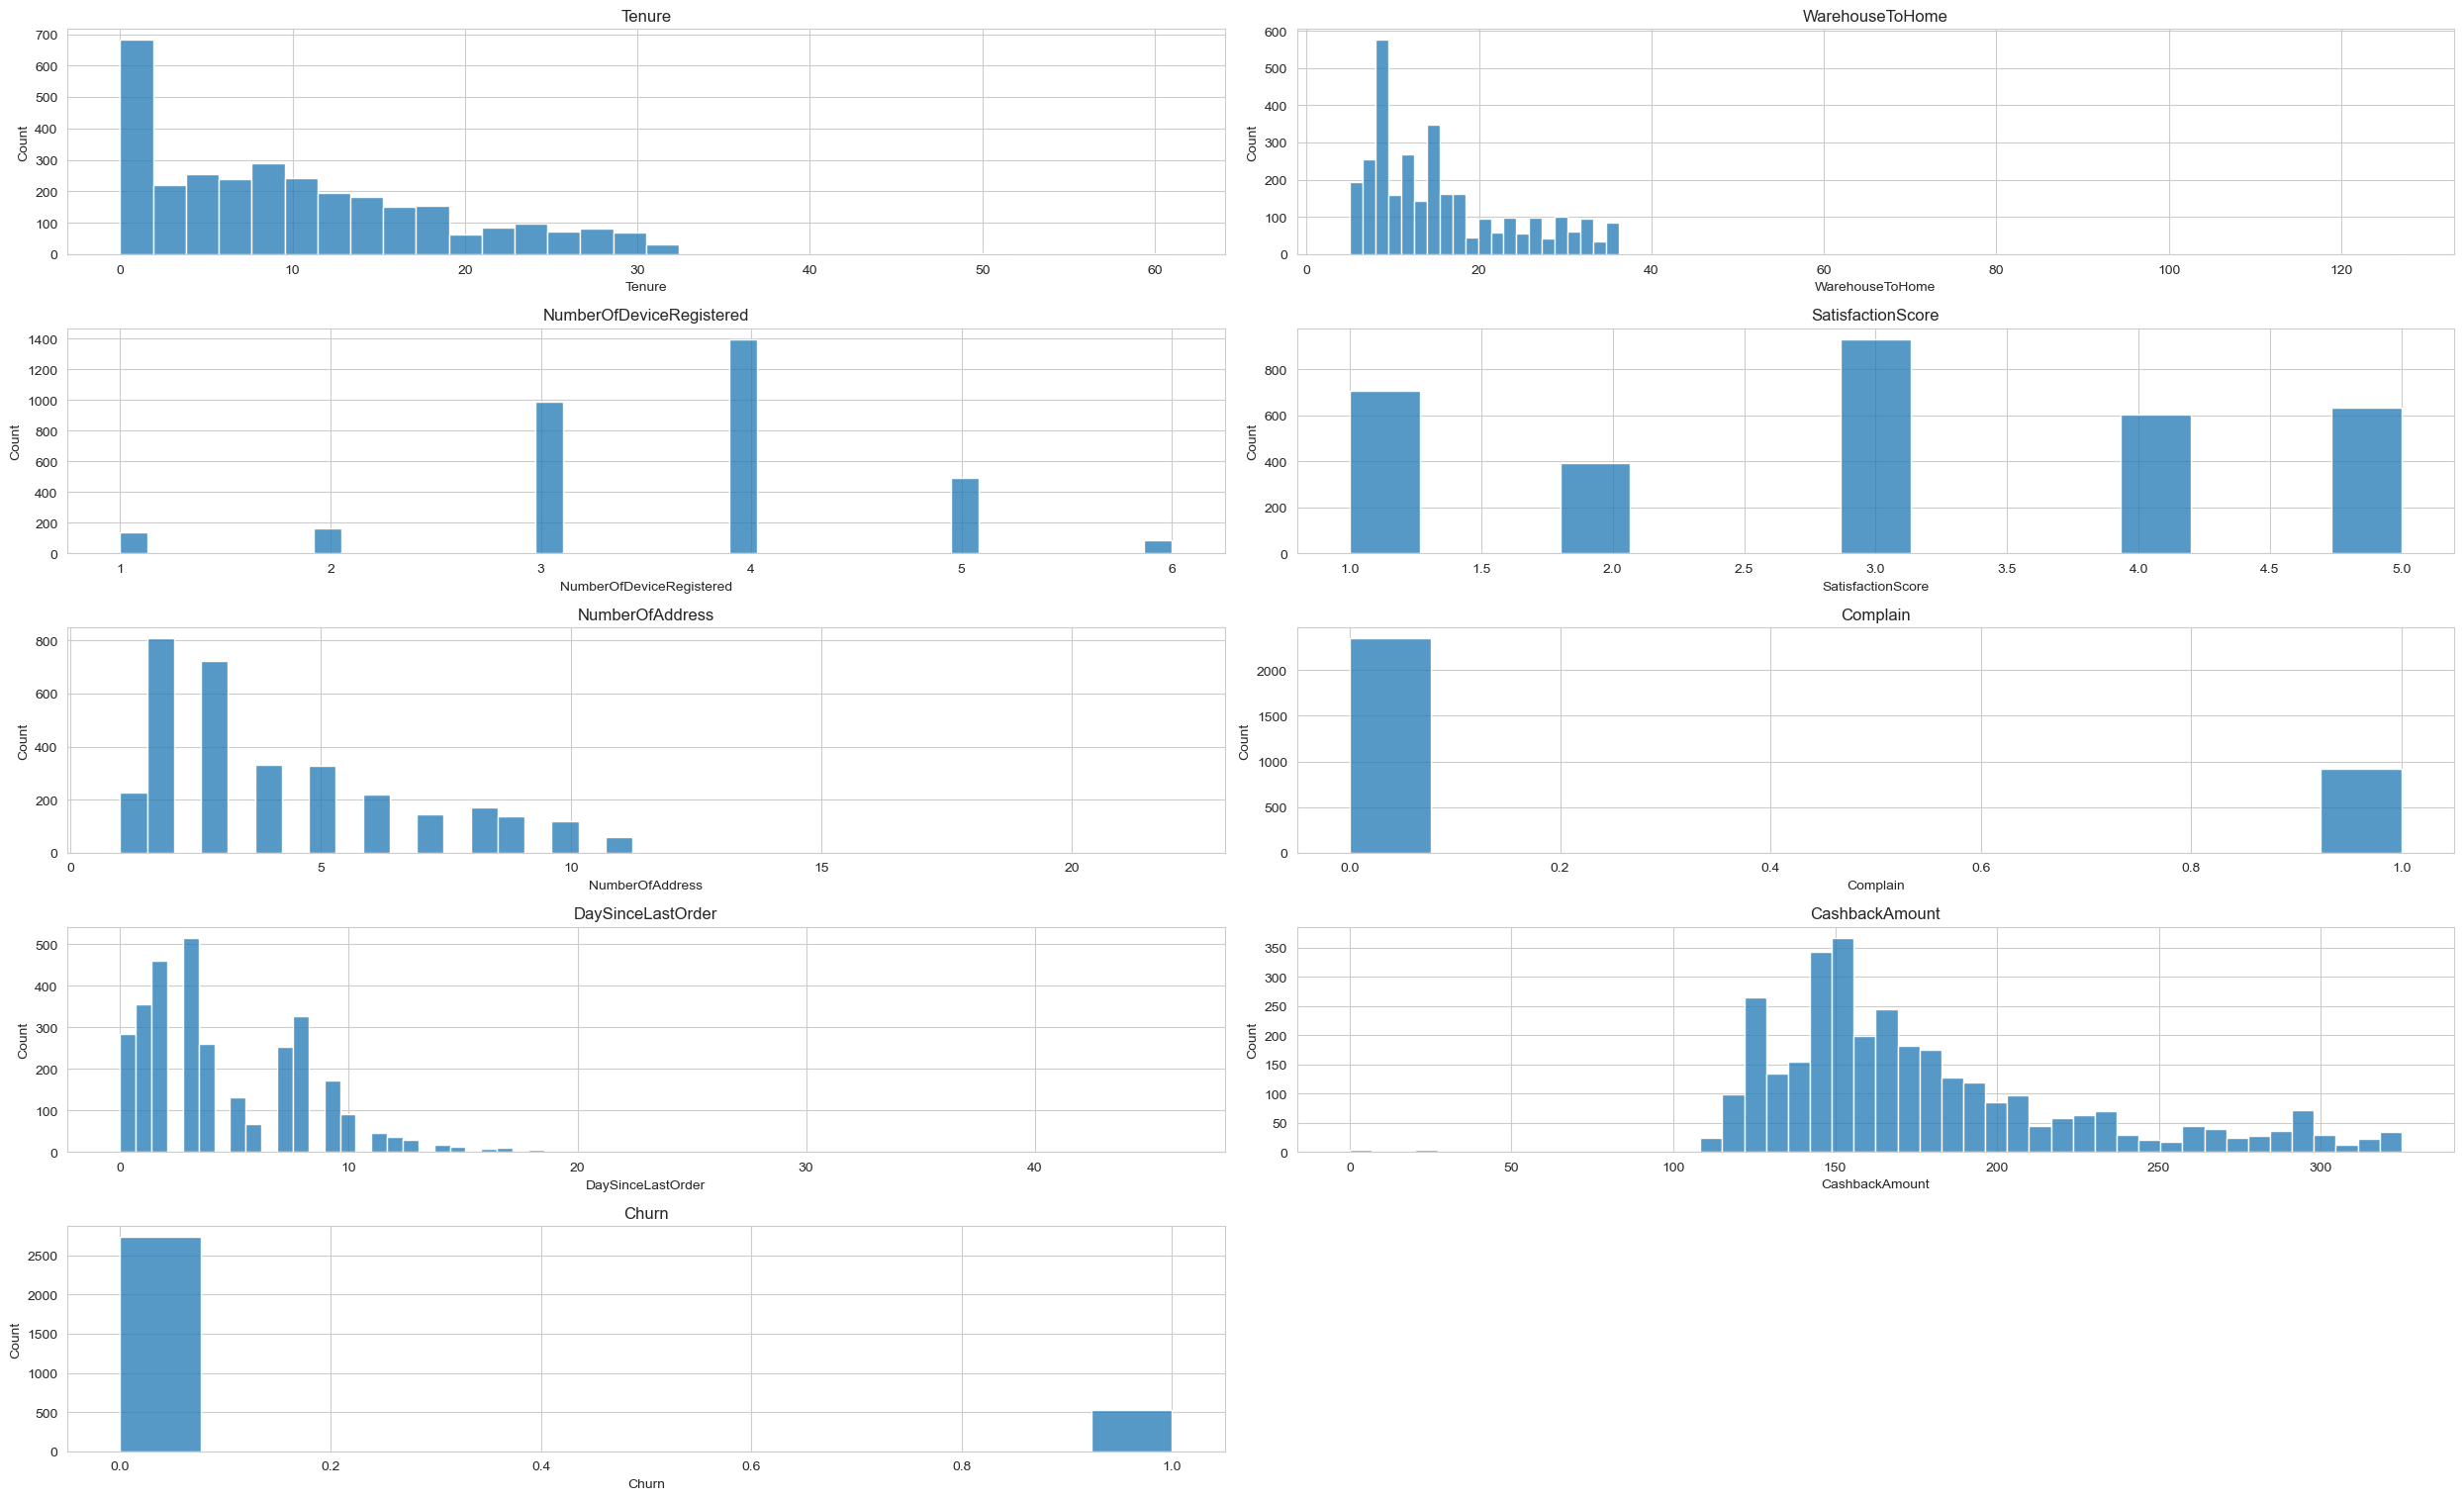

In [184]:
col_names = num_features
plotnumber = 1
plt.figure(figsize=(25,30))

for kolom in col_names:
    plt.subplot(10,2, plotnumber)
    sns.histplot(data=df, x=kolom)
    plt.title(kolom)
    plt.tight_layout()

    plotnumber += 1


<AxesSubplot: xlabel='DaySinceLastOrder', ylabel='Count'>

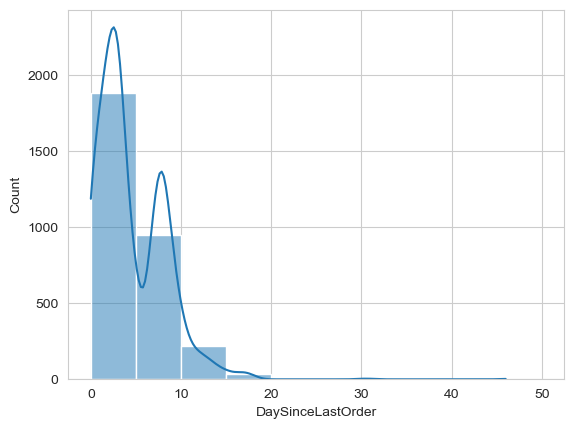

In [185]:
sns.histplot(data=df, x='DaySinceLastOrder', kde=True, binrange=(0,50), binwidth=(5))

In [186]:
df['NumberOfDeviceRegistered'].value_counts()


4    1396
3     991
5     493
2     163
1     137
6      89
Name: NumberOfDeviceRegistered, dtype: int64

In [187]:
df['Complain'].value_counts()

0    2348
1     921
Name: Complain, dtype: int64

In [188]:
df['SatisfactionScore'].value_counts()

3    931
1    707
5    635
4    604
2    392
Name: SatisfactionScore, dtype: int64

In [189]:
df.isna().sum()

Tenure                      159
WarehouseToHome             135
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           181
CashbackAmount                0
Churn                         0
dtype: int64

- Data Distributions:

    Based on the results of observations of data distribution, it was concluded that all numerical data were not normally distributed, and there were outliers in the columns: ***'Tenure', 'WarehouseToHome', 'DaySinceLastOrder'***

    So filling in missing values can be considered using 'median' [click: Reference](https://medium.com/analytics-vidhya/appropriate-ways-to-treat-missing-values-f82f00edd9be). However, we will further study whether this value is missing randomly or not.



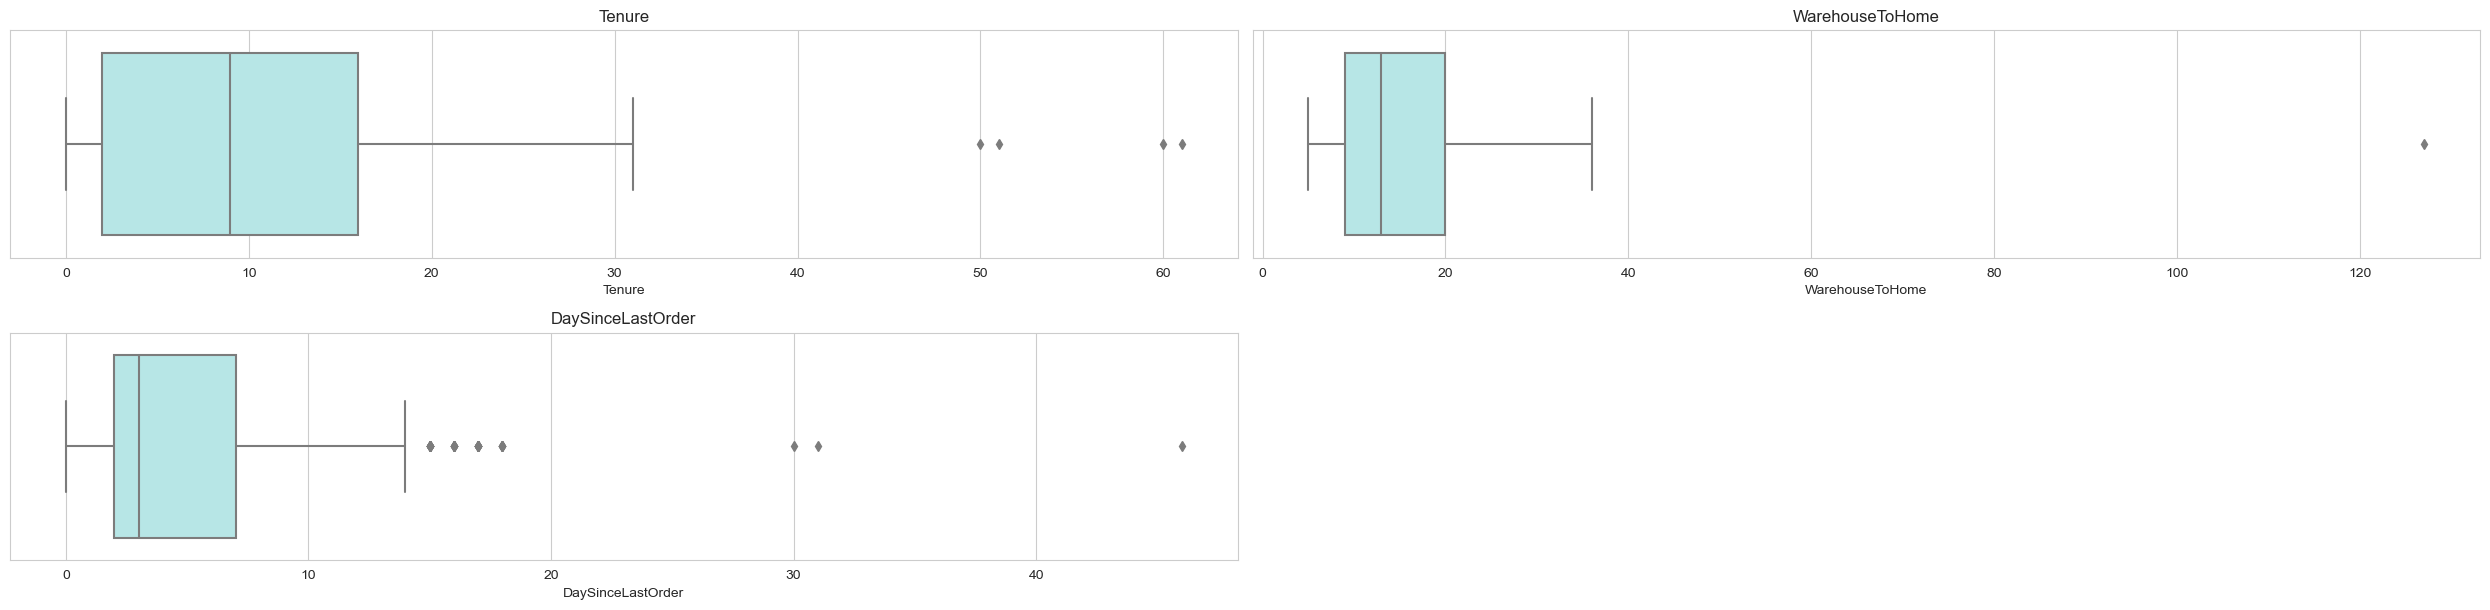

In [190]:
col_names = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']
plotnumber = 1
plt.figure(figsize=(25,30))

for kolom in col_names:
    plt.subplot(10,2, plotnumber)
    sns.boxplot(data=df, x=kolom, color='paleturquoise')
    plt.title(kolom)
    plt.tight_layout()

    plotnumber += 1



In [191]:
# Identify lower bound, upper bound, outliers and presentation of outliers
col_names = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']

Q1 = df[col_names].quantile(0.25)
Q3 = df[col_names].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

for i, feature in enumerate(col_names):
    condition = (df[feature] < lower_bound[i]) | (df[feature] > upper_bound[i])
    outlier = df.loc[condition, feature].count()
    PersentaseOutlier = outlier / df[feature].count() * 100
    print(f"Lower Bound {feature} is {round(lower_bound[i], 2)}, and Upper Bound {feature} is {round(upper_bound[i], 2)}, there are {outlier} data that deviate from the usual data, which is {round(PersentaseOutlier, 2)}%")


Lower Bound Tenure is -19.0, and Upper Bound Tenure is 37.0, there are 4 data that deviate from the usual data, which is 0.13%
Lower Bound WarehouseToHome is -7.5, and Upper Bound WarehouseToHome is 36.5, there are 1 data that deviate from the usual data, which is 0.03%
Lower Bound DaySinceLastOrder is -5.5, and Upper Bound DaySinceLastOrder is 14.5, there are 40 data that deviate from the usual data, which is 1.3%


- ***Based on the visualization results of boxplot data distribution and quantile calculation above, the outliers in the 'Tenure' and 'Warehouse' columns will be dropped with the following considerations:***

    - **Consistency:** Data outliers can affect model performance and make results inconsistent. 
    - **Overfitting:** Data outliers can lead to model overfitting, which means the model learns too much from the data and is unable to generalize to new data. 
    - **Target values:** Data outliers can have a large effect on the target values used in modeling.
    - **Data distribution:** Data distribution can affect model performance. If the data distribution is highly asymmetrical, the data outliers may have to be removed.

    [reference](https://www.analyticsvidhya.com/blog/2022/07/outliers-and-overfitting-when-machine-learning-models-cant-reason/#:~:text=Key%20points%20to%20note%3A&text=in%20the%20past.-,When%20a%20distribution%20or%20dataset%20from%20which%20a%20computer%20should,false%20results%2C%20which%20is%20overfitting.)

-  For column 'DaySinceLastOrder' and "CashbackAmount" the outliers will be ignored because they are considered a fair value if they have a value with a high variance. Further processing will be handled during the preprocessing section by binning 'CashbackAmount'.


In [192]:
# Drop outliers in 'Tenure' and 'WarehouseToHome'

df.drop(df[(df['Tenure']>37) | (df['WarehouseToHome']>36.5)].index, inplace=True)

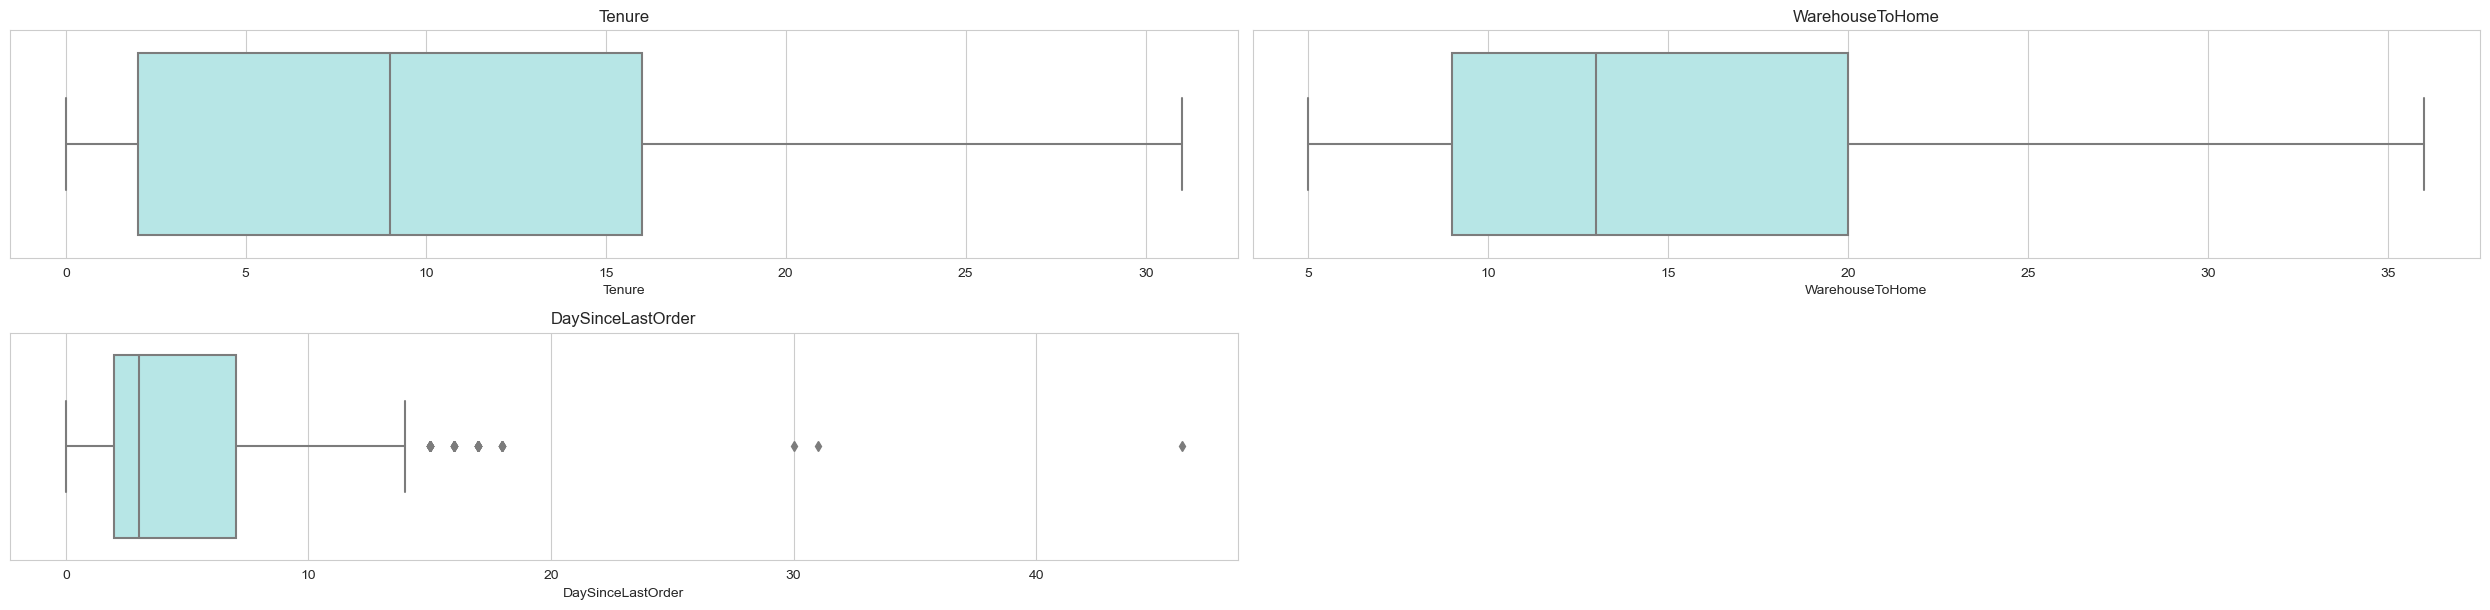

In [193]:
# Make sure no outliers in column 'Tenure' and 'WarehouseToHome'

col_names = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']
plotnumber = 1
plt.figure(figsize=(25,30))

for kolom in col_names:
    plt.subplot(10,2, plotnumber)
    sns.boxplot(data=df, x=kolom, color='paleturquoise')
    plt.title(kolom)
    plt.tight_layout()

    plotnumber += 1

# As the boxplot visualization the outliers of the 'Tenure' 
# and 'WarehouseToHome' coulmns has been sucessfully removed

### Identify is Missing Value MAR, MNAR, or MCAR

In [197]:
df[['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']].corr()

,Tenure,WarehouseToHome,DaySinceLastOrder
Tenure,1.000000,-0.039935,0.175796
WarehouseToHome,-0.039935,1.000000,0.025146
DaySinceLastOrder,0.175796,0.025146,1.000000


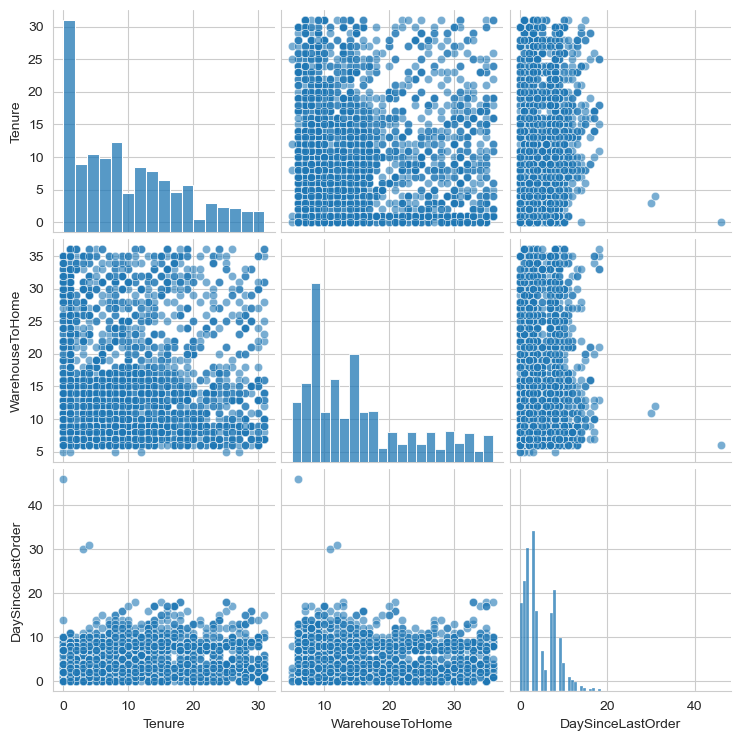

In [198]:
sns.pairplot(df[['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']], diag_kind="hist", plot_kws={'alpha': 0.6})
plt.show()

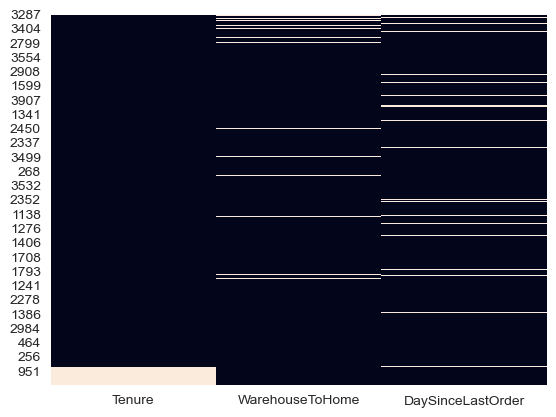

In [199]:
sns.heatmap(df[['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']].sort_values('Tenure').isnull(), cbar=False)
plt.show()

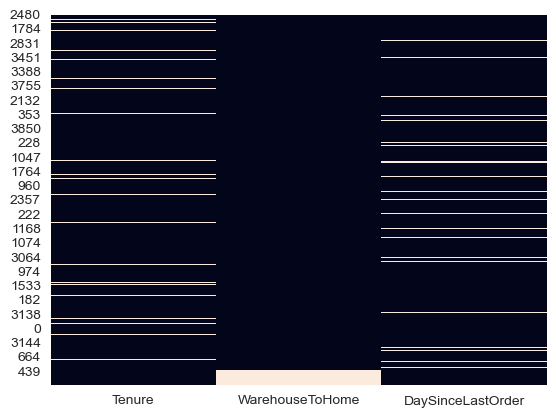

In [200]:
sns.heatmap(df[['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']].sort_values('WarehouseToHome').isnull(), cbar=False)
plt.show()

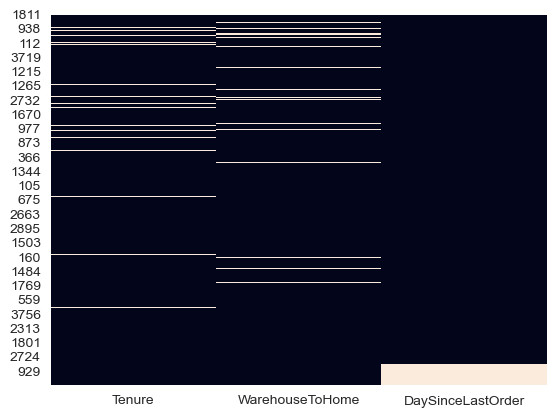

In [201]:
sns.heatmap(df[['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']].sort_values('DaySinceLastOrder').isnull(), cbar=False)
plt.show()

In [202]:
df[['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']].corr()


,Tenure,WarehouseToHome,DaySinceLastOrder
Tenure,1.000000,-0.039935,0.175796
WarehouseToHome,-0.039935,1.000000,0.025146
DaySinceLastOrder,0.175796,0.025146,1.000000


- Based on the Pairwise Correlation Test, it can be concluded that between features ('Tenure', 'WarehouseToHome', 'DaySinceLastOrder') that have missing values do not have a strong correction:
<br><br>

| **Feature** | **Tenure** |     |
| --- | --- | --- |
| WarehouseToHome | -0.028010 | **WarehouseToHome** |
| DaySinceLastOrder | 0.170329 | 0.170329 |

<br><br>
- Likewise, the results of the Scatter Plot Matrix visualization are also supported with plot_kws={'alpha': 0.6} to set transparency to make it easier to see missing values.
The results of the scatter plot do not find a dot pattern for missing values, meaning that the dots with missing values are scattered randomly, this indicates that the missing data is MCAR.

- On the Heatmap the visualization results also show that a low value on WareHouseToHome does not affect the missing data set line at a certain value, but at 'Tenure' and 'DaySinceLastOrder' Low and High there are missing values that do not tend to converge in a certain range of values


Summary:
- Based on the results of the EDA loss of data that does not have a strong correlation and no pattern is found, it is concluded that the missing value is the MCAR
- We have several options for handling MCAR using:
    - IterativeImputer()
    - KNNImputer()
    - SimpleImputer() with 'median'

In [203]:
df.shape

(3264, 11)

# Data Analysis

In [204]:
# Perbandingan pelanggan tidak churn dan churn
df['Churn'].value_counts()

0    2731
1     533
Name: Churn, dtype: int64

In [205]:
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile Phone,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


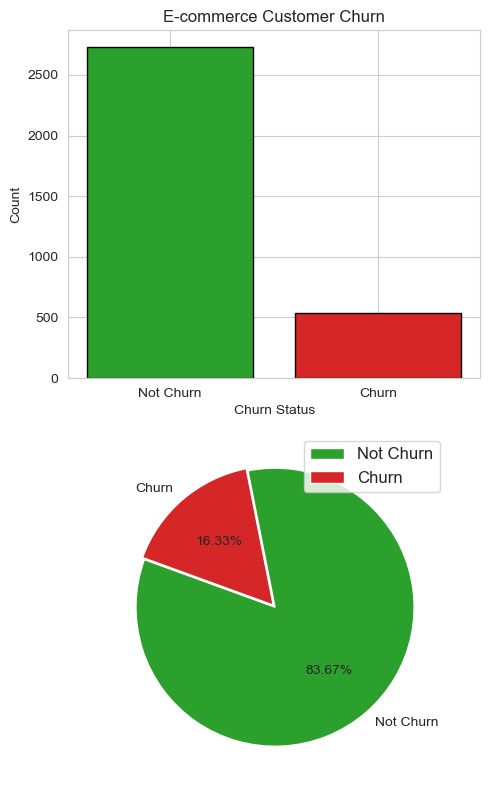

In [206]:
# Proportions of Customer Churn and Not Churn

value_counts = df['Churn'].value_counts()

fig, axs = plt.subplots(2, 1, figsize=(5, 8))

# Stacked bar plot
axs[0].bar(x=['Not Churn', 'Churn'], 
    height=value_counts, 
    color=['tab:green', 'tab:red'], 
    edgecolor='black')
axs[0].set_xlabel('Churn Status')
axs[0].set_ylabel('Count')
axs[0].set_title('E-commerce Customer Churn')

# Pie chart
axs[1].pie(
    value_counts, 
    labels=['Not Churn', 'Churn'], 
    colors=['tab:green', 'tab:red'], 
    autopct='%.2f%%', 
    explode=(0.01, 0.01),
    startangle=160)

plt.tight_layout()
plt.legend(fontsize=12, loc="best")
plt.show()


Summary:

The data is imbalanced, with 83.67% not churning and 16.33% churning. To improve machine learning predictions for the minority class, SMOTE (Synthetic Minority Oversampling Technique) resampling will be applied during modeling. The next analysis will examine the impact of each feature on customer churn.

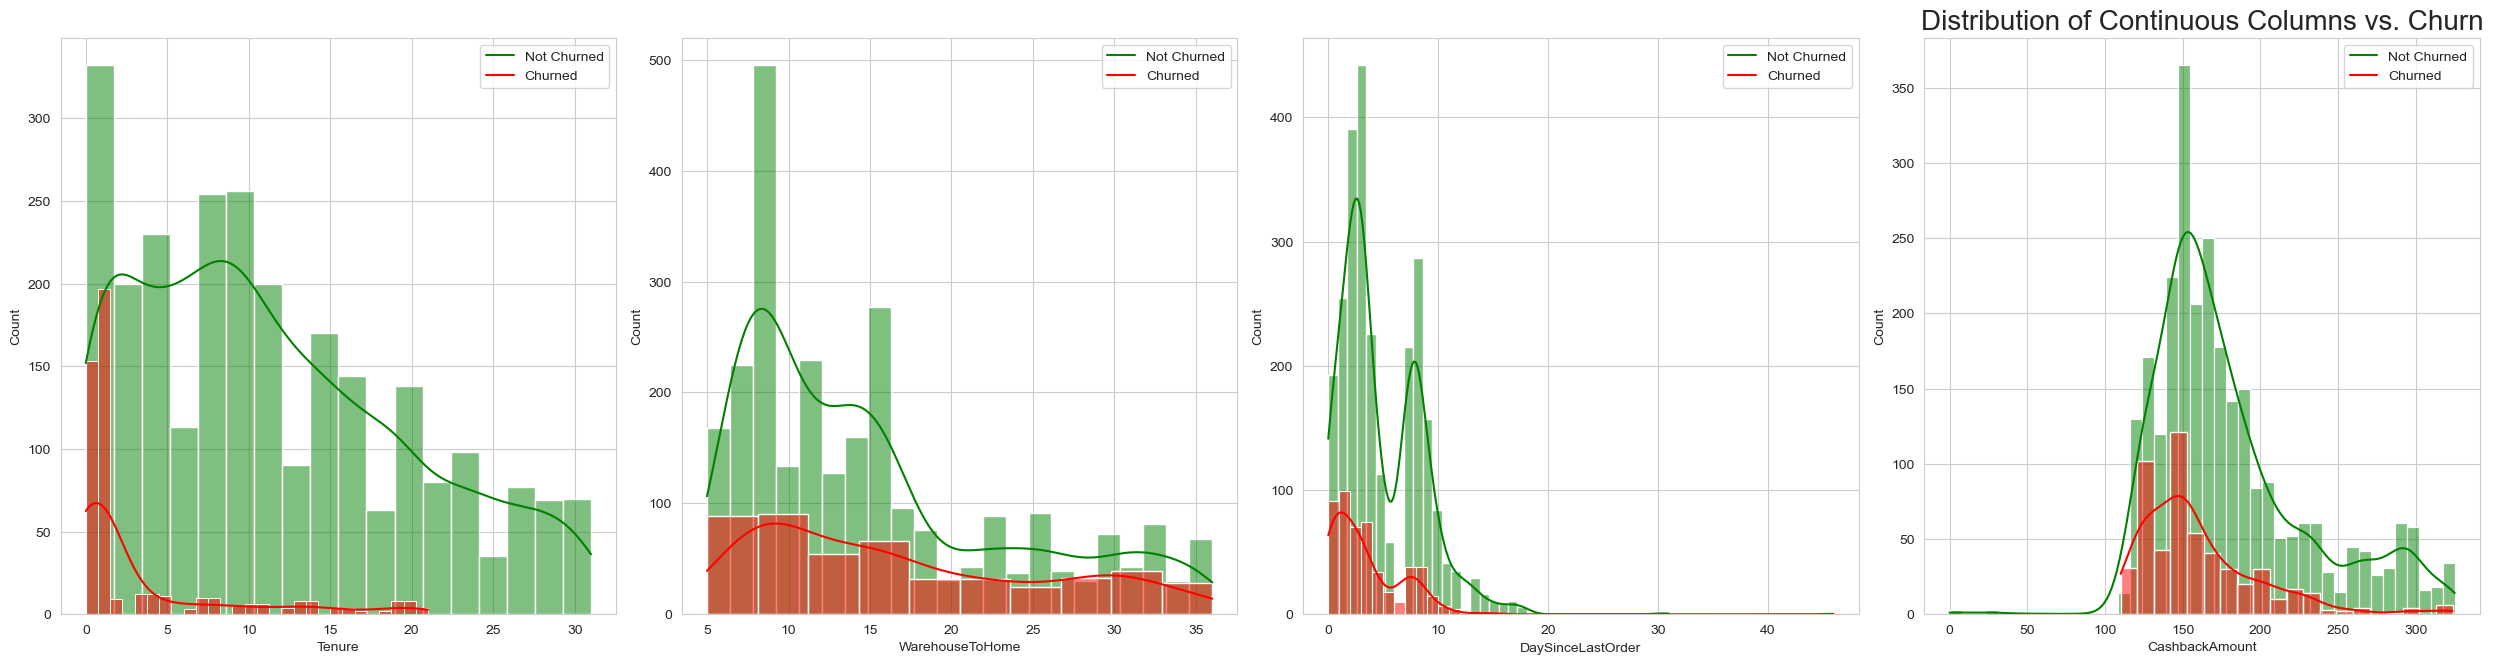

In [207]:
# Distribution of continuous columns vs. churn
continuous = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount']

plt.figure(figsize=(25,25))
for i, column in enumerate(continuous):
    plt.subplot(4,4,i+1)
    sns.histplot(x=df.loc[df['Churn']==0, column], kde=True, color='green')
    sns.histplot(x=df.loc[df['Churn']==1, column], kde=True, color='red')
    plt.legend(labels=['Not Churned', 'Churned'])
    plt.tight_layout()

plt.title('Distribution of Continuous Columns vs. Churn', fontsize=20)
plt.show()


Refer to the chart above, the continuous distribution for churn. Since the proportion for non-churn is greater than churn we draw some insights:


* Tenure is the period of use of the e-commerce platform from the first time you register in months, the smaller the month you use the platform, the greater the customer churn. Customers with a tenure of more than 20 months tend not to churn

* WarehouseToHome is the distance between the warehouse and the customer's house, customer data churn is almost evenly distributed. But the difference between churn and non-churn customers over 20KM is very small, so it can be concluded that the farther the warehouse is from the customer's house, the more likely the customer is not churn compared to churn.

* DaySinceLastOrder on churn and non-churn customers shows almost the same distribution.

* The highest cashback amount of churn customers is around 150, and the factors will be further analyzed.

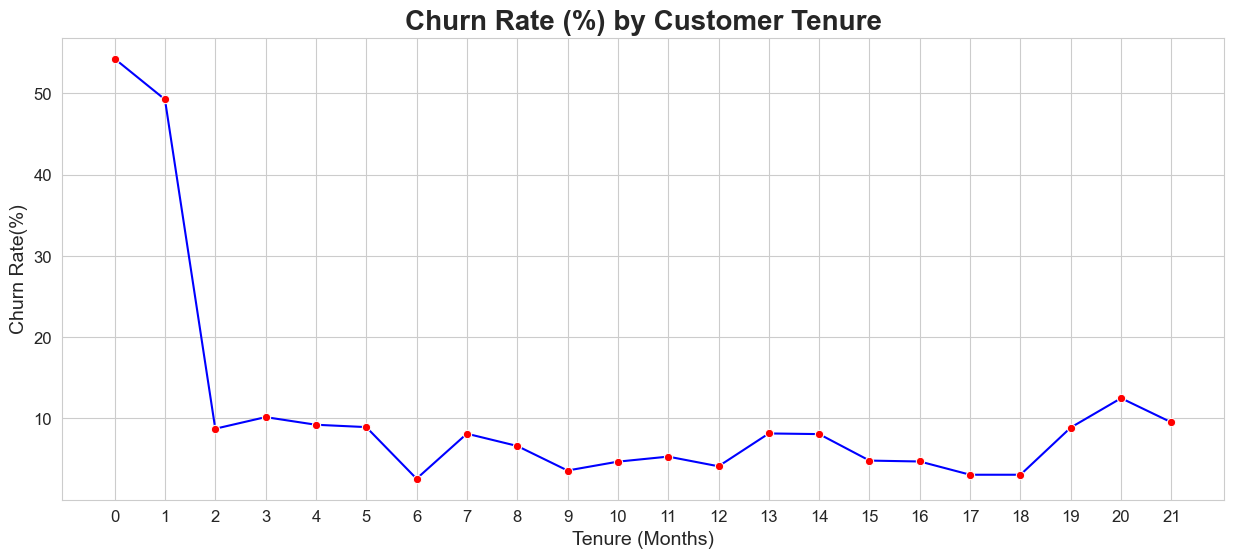

In [208]:
tenure_churn = df.groupby("Tenure",as_index=False)["Churn"].mean().sort_values("Churn",ascending=False)
tenure_churn['Churn'] = round(tenure_churn['Churn'] * 100, 2)
tenure_churn = tenure_churn[tenure_churn['Churn'] > 0]

#visualisasi
plt.figure(figsize=(15,6))
sns.lineplot(data=tenure_churn, y="Churn", x="Tenure", marker="o", markerfacecolor='red', color='blue')

plt.title("Churn Rate (%) by Customer Tenure",fontsize=20, fontweight='bold')
plt.xlabel("Tenure (Months)",fontsize=14)
plt.xticks(tenure_churn["Tenure"].values, fontsize=12)
plt.ylabel("Churn Rate(%)",fontsize=14)
plt.yticks(fontsize=12)
plt.show()

Customers with a tenure of more than 20 months tend to be loyal customers

## Define X and y

In [211]:
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile Phone,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [212]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [213]:
y.value_counts() / len(X)*100

0    83.670343
1    16.329657
Name: Churn, dtype: float64

# Data Splitting

In [214]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size= 0.2,
    random_state= 2,
    stratify=y
)

In [215]:
print(X_train.shape)
print(y_train.shape)


(2611, 10)
(2611,)


In [216]:
X.columns

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus',
       'NumberOfAddress', 'Complain', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

## Preprocessing


- **Impute Missig Value --> Handling Missing Values:** 'Tenure', 'WarehouseToHome' 'DaySinceLastOrder' 

- **OneHot:** 'PreferedOrderCat', 'MaritalStatus'

- **Ordinal:** 'CashbackClass'

- **Scaling:** 'Tenure', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount',



- Existing data:
    - 'SatisfactionScore': Ordinal (Possible to scaling)
    - 'MaritalStatus': Binary Encoder (Not possible scaling)
<br>
- Considerations:
    - Model required to scaling:
        - LogisticRegression
        - KNN
    - Model do not required scaling:
        - DecisionTreeClassifier
        - RandomForest

In [220]:
# Pipeline for Missing Values Imputation and Scaler
pipe_imputation_scaling = Pipeline([
    ('imputer',IterativeImputer(random_state=0)), # Pipeline for missing values
    ('poly', PolynomialFeatures(degree=1)),         # Since the feature is less than 10, we use polynomial
    ('scaler', RobustScaler())                     # Pipeline for scaling 
])

transformer = ColumnTransformer([
    ('pipe_imputation_scaling', pipe_imputation_scaling, ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount']),
    ('onehot', OneHotEncoder(drop='first'), ['PreferedOrderCat', 'MaritalStatus'])                  # Transform to OneHot Encoder
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_imputation_scaling',
                                 Pipeline(steps=[('imputer',
                                                  IterativeImputer(random_state=0)),
                                                 ('poly',
                                                  PolynomialFeatures(degree=1)),
                                                 ('scaler', RobustScaler())]),
                                 ['Tenure', 'WarehouseToHome',
                                  'NumberOfDeviceRegistered',
                                  'SatisfactionScore', 'NumberOfAddress',
                                  'DaySinceLastOrder', 'CashbackAmount']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['PreferedOrderCat', 'MaritalStatus'])])

In [221]:
from scipy import sparse

# Makesure transformer sucessfully impute the missing values

data = X

# Fit and transform the data using the transformer
transformed_data = transformer.fit_transform(data)

# Check the number of missing values in the transformed data
missing_values = pd.isna(transformed_data).sum().sum()

print("Number of missing values in the transformed data:", missing_values)


Number of missing values in the transformed data: 0


## Benchmark Model 

### Cross validation

- Log Reg
- KNN
- Decision Tree

Ensemble Various:
- Voting Classifier
- Stacking Classifier

Ensemble Similar:
- Random Forest
- Adaboost
- GradientBoost
- XGBoost

### Model Benchmarking : K-Fold

In [222]:
# resampler
smote = SMOTE(random_state=0)
nearmiss= NearMiss()
ros = RandomOverSampler(random_state=0)
rus = RandomUnderSampler(random_state=0)

In [223]:
# Initialize the base models
logreg = LogisticRegression(random_state=0, class_weight='balanced', solver='liblinear')
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=0, max_depth=5)

# Similar
rf = RandomForestClassifier(random_state=0)
adaboost = AdaBoostClassifier(random_state=0)
gboost = GradientBoostingClassifier(random_state=0)
xgb = XGBClassifier(random_state=0)

In [ ]:
# F2 score 
# Due to the cost of FN (predicted not to be churn, even though it was actually churn) 
# is higher than FP (predicted to be churn, even though it wasn't actually churn))

f2_score = make_scorer(fbeta_score, beta=2)

### Model Benchmarking 

In [225]:
# voting
voting_ens = VotingClassifier([
    ('clf1', logreg),
    ('clf2', knn),
    ('clf3', tree),
    ('clf4', rf),
    ('clf5', adaboost),
    ('clf6', gboost),
    ('clf7', xgb)
],voting='soft' )

# stacking
stacking_ens = StackingClassifier([
    ('clf1', logreg),
    ('clf2', knn),
    ('clf3', tree),
    ('clf4', rf),
    ('clf5', adaboost),
    ('clf6', gboost),
    ('clf7', xgb)
])

In [226]:
# cross validation

list_model = [logreg, knn, tree, rf, voting_ens, stacking_ens, adaboost, gboost, xgb]
list_all = []
list_mean = []
list_std = []

for model in list_model:

    pipe_model = Pipeline([
        ('transformer', transformer),
        ('resampler', smote),
        ('model', model)
    ])

    model_cv = cross_val_score(
        estimator= pipe_model,
        X= X_train,
        y= y_train,
        scoring=f2_score,
        cv= 5,
    )

    list_all.append(model_cv.round(4))
    list_mean.append(model_cv.mean())
    list_std.append(model_cv.std())

In [227]:
df_score = pd.DataFrame({
    'algo': list_model,
    'mean': list_mean,
    'std': list_std,
    'all_score': list_all
})

df_score

,algo,mean,std,all_score
0,"LogisticRegression(class_weight='balanced', ra...",0.691992,0.017514,"[0.6738, 0.7171, 0.6841, 0.7085, 0.6765]"
1,KNeighborsClassifier(),0.666474,0.016951,"[0.67, 0.6827, 0.6751, 0.6338, 0.6707]"
2,"DecisionTreeClassifier(max_depth=5, random_sta...",0.666400,0.046467,"[0.5914, 0.6522, 0.7296, 0.6972, 0.6616]"
3,RandomForestClassifier(random_state=0),0.692026,0.023109,"[0.6829, 0.7194, 0.6846, 0.716, 0.6573]"
4,"VotingClassifier(estimators=[('clf1',\n ...",0.728083,0.033130,"[0.6629, 0.7403, 0.736, 0.7534, 0.7478]"
5,"StackingClassifier(estimators=[('clf1',\n ...",0.653293,0.023662,"[0.6295, 0.6988, 0.6468, 0.6444, 0.6471]"
6,AdaBoostClassifier(random_state=0),0.638389,0.025558,"[0.6022, 0.6441, 0.6236, 0.6427, 0.6794]"
7,GradientBoostingClassifier(random_state=0),0.666605,0.027658,"[0.6321, 0.7009, 0.6643, 0.641, 0.6948]"
8,"XGBClassifier(base_score=None, booster=None, c...",0.693169,0.032223,"[0.706, 0.6938, 0.6357, 0.7346, 0.6958]"


In [228]:
# Combine the results of all models in a dataframe
results_df = pd.DataFrame({'model':['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Voting Classifier', 'Stacking Classifier', 'Adaboost', 'GradientBoost', 'XGBoost Classifier'],
                         'mean f2 score': list_mean, 'sdev': list_std, 'all_score':list_all})

# Set the index of the dataframe
results_df.set_index('model', inplace=True)

# Sort the results by mean roc_auc in descending order
results_df.sort_values(by='mean f2 score', ascending=False, inplace=True)

# Display the results
results_df

,mean f2 score,sdev,all_score
model,,,
Voting Classifier,0.728083,0.033130,"[0.6629, 0.7403, 0.736, 0.7534, 0.7478]"
XGBoost Classifier,0.693169,0.032223,"[0.706, 0.6938, 0.6357, 0.7346, 0.6958]"
Random Forest,0.692026,0.023109,"[0.6829, 0.7194, 0.6846, 0.716, 0.6573]"
Logistic Regression,0.691992,0.017514,"[0.6738, 0.7171, 0.6841, 0.7085, 0.6765]"
GradientBoost,0.666605,0.027658,"[0.6321, 0.7009, 0.6643, 0.641, 0.6948]"
K-Nearest Neighbors,0.666474,0.016951,"[0.67, 0.6827, 0.6751, 0.6338, 0.6707]"
Decision Tree,0.666400,0.046467,"[0.5914, 0.6522, 0.7296, 0.6972, 0.6616]"
Stacking Classifier,0.653293,0.023662,"[0.6295, 0.6988, 0.6468, 0.6444, 0.6471]"
Adaboost,0.638389,0.025558,"[0.6022, 0.6441, 0.6236, 0.6427, 0.6794]"


In [229]:
voting_benchmark_mean = results_df.loc['Voting Classifier']['mean f2 score']
voting_benchmark_std = results_df.loc['Voting Classifier']['sdev']

xgboost_benchmark_mean = results_df.loc['XGBoost Classifier']['mean f2 score']
xgboost_benchmark_std = results_df.loc['XGBoost Classifier']['sdev']

rf_benchmark_mean = results_df.loc['Random Forest']['mean f2 score']
rf_bechmark_std = results_df.loc['Random Forest']['sdev']

logreg_benchmark_mean = results_df.loc['Logistic Regression']['mean f2 score']
logreg_bechmark_std = results_df.loc['Logistic Regression']['sdev']

Based on Benchmark Model we will hyperparamter tuning, these following:

- VotingClassifier :
    - Performance: 0.728083
    - Stability: 0.033130
- Logistic Regression:
    - Performance: 0.691992
    - Stability: 0.017514
- RandomForest Classifier:
    - Performance: 0.692026
    - Stability: 0.023109
- XGBoostClassifier:
    - Performance: 0.693169
    - Stability: 0.032223

Since these models having the highest perfomance, but having slighly difference between each others.


# Hyperparameter Tuning

- VotingClassifier :
    - Performance: 0.728083
- Logistic Regression:
    - Performance: 0.691992
- RandomForest Classifier:
    - Performance: 0.692026
- XGBoostClassifier:
    - Performance: 0.693169


## Random Forest Classifier
1st Hyperparameter Tuning

In [230]:
# untuk estimator
pipe_model = Pipeline([
    ('transformer', transformer),
    ('resampler', smote),
    ('model', rf)
])


# RandomForest Hyperparameter Tuning
hyperparam_rf = [{
    'resampler':[smote, ros, rus, nearmiss, None],
    'model__n_estimators':[200, 220],
    'model__max_features' : range(1, len(X.columns), 1),
    'model__max_depth':range(3,50,1),
    'model__min_samples_split':range(2,100,2), #min_samples_split minimal 2
    'model__min_samples_leaf':[2, 3],
    'transformer__pipe_imputation_scaling__imputer': [SimpleImputer(strategy='median'), KNNImputer(), IterativeImputer()],  # Choosing Imputer Function for Missin Value
    'transformer__pipe_imputation_scaling__scaler': [MinMaxScaler(), StandardScaler(), RobustScaler()],
    'transformer__pipe_imputation_scaling__poly__degree': [1,2,3]
             }]

randomsearch_rf = RandomizedSearchCV(
    estimator = pipe_model,
    param_distributions = hyperparam_rf, 
    cv = 5, 
    scoring = f2_score,
    n_jobs= -1,
    n_iter = 1000,
)

randomsearch_rf

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_imputation_scaling',
                                                                               Pipeline(steps=[('imputer',
                                                                                                IterativeImputer(random_state=0)),
                                                                                               ('poly',
                                                                                                PolynomialFeatures(degree=1)),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'NumberOfDeviceRegistered',
                                                                                'SatisfactionScore',...
                                                       RandomUnderSampler(random_state=0),
                                                       NearMiss(), None],
                                         'transformer__pipe_imputation_scaling__imputer': [SimpleImputer(strategy='median'),
                                                                                           KNNImputer(),
                                                                                           IterativeImputer()],
                                         'transformer__pipe_imputation_scaling__poly__degree': [1,
                                                                                                2,
                                                                                                3],
                                         'transformer__pipe_imputation_scaling__scaler': [MinMaxScaler(),
                                                                                          StandardScaler(),
                                                                                          RobustScaler()]}],
                   scoring=make_scorer(fbeta_score, beta=2))

In [231]:
randomsearch_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_imputation_scaling',
                                                                               Pipeline(steps=[('imputer',
                                                                                                IterativeImputer(random_state=0)),
                                                                                               ('poly',
                                                                                                PolynomialFeatures(degree=1)),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'NumberOfDeviceRegistered',
                                                                                'SatisfactionScore',...
                                                       RandomUnderSampler(random_state=0),
                                                       NearMiss(), None],
                                         'transformer__pipe_imputation_scaling__imputer': [SimpleImputer(strategy='median'),
                                                                                           KNNImputer(),
                                                                                           IterativeImputer()],
                                         'transformer__pipe_imputation_scaling__poly__degree': [1,
                                                                                                2,
                                                                                                3],
                                         'transformer__pipe_imputation_scaling__scaler': [MinMaxScaler(),
                                                                                          StandardScaler(),
                                                                                          RobustScaler()]}],
                   scoring=make_scorer(fbeta_score, beta=2))

In [232]:
randomsearch_rf.best_score_

0.7576090393224699

In [233]:
pd.DataFrame(randomsearch_rf.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_transformer__pipe_imputation_scaling__scaler,param_transformer__pipe_imputation_scaling__poly__degree,param_transformer__pipe_imputation_scaling__imputer,param_resampler,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_features,param_model__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
950,0.860885,0.019346,0.044759,0.005869,MinMaxScaler(),1,KNNImputer(),RandomOverSampler(random_state=0),220,16,3,5,30,{'transformer__pipe_imputation_scaling__scaler...,0.717439,0.772727,0.737705,0.795207,0.764967,0.757609,0.027225,1
99,0.753495,0.039378,0.029223,0.003525,StandardScaler(),1,IterativeImputer(),RandomOverSampler(random_state=0),200,28,3,5,11,{'transformer__pipe_imputation_scaling__scaler...,0.692964,0.796943,0.756881,0.786638,0.753275,0.757340,0.036298,2
594,0.781221,0.013326,0.040241,0.002854,MinMaxScaler(),1,KNNImputer(),RandomOverSampler(random_state=0),200,18,2,5,20,{'transformer__pipe_imputation_scaling__scaler...,0.728477,0.793651,0.727700,0.783664,0.746102,0.755919,0.027710,3
637,0.816520,0.012686,0.037238,0.003343,RobustScaler(),1,KNNImputer(),RandomOverSampler(random_state=0),200,6,3,5,31,{'transformer__pipe_imputation_scaling__scaler...,0.704698,0.787671,0.724466,0.803965,0.756208,0.755401,0.037224,4
6,0.936372,0.009724,0.040461,0.006459,RobustScaler(),1,KNNImputer(),RandomOverSampler(random_state=0),200,14,3,7,36,{'transformer__pipe_imputation_scaling__scaler...,0.723684,0.799550,0.737705,0.746102,0.764967,0.754402,0.026234,5


## Random Forest Classifier
2nd Hyperparameter Tuning

In [234]:
# Estimator
pipe_model = Pipeline([
    ('transformer', transformer),
    ('resampler', smote),
    ('model', rf)
])


# RandomForest Hyperparameter Tuning
hyperparam_rf = [{
    'resampler':[ros],
    'model__n_estimators':[200, 220],
    'model__max_features' : range(3,5,1),
    'model__max_depth':range(20,50,1),
    'model__min_samples_split':range(2,50,2), #min_samples_split minimal 2
    'model__min_samples_leaf':[2, 3],
    'transformer__pipe_imputation_scaling__imputer': [SimpleImputer(strategy='median')],  # Choosing Imputer Function for Missin Value
    'transformer__pipe_imputation_scaling__scaler': [MinMaxScaler(), StandardScaler()],
    'transformer__pipe_imputation_scaling__poly__degree': [1]
             }]

randomsearch_rf_2nd = RandomizedSearchCV(
    estimator = pipe_model,
    param_distributions = hyperparam_rf, 
    cv = 5, 
    scoring = f2_score,
    n_jobs= -1,
    n_iter = 1000,
)

randomsearch_rf_2nd

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_imputation_scaling',
                                                                               Pipeline(steps=[('imputer',
                                                                                                IterativeImputer(random_state=0)),
                                                                                               ('poly',
                                                                                                PolynomialFeatures(degree=1)),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'NumberOfDeviceRegistered',
                                                                                'SatisfactionScore',...
                                         'model__min_samples_split': range(2, 50, 2),
                                         'model__n_estimators': [200, 220],
                                         'resampler': [RandomOverSampler(random_state=0)],
                                         'transformer__pipe_imputation_scaling__imputer': [SimpleImputer(strategy='median')],
                                         'transformer__pipe_imputation_scaling__poly__degree': [1],
                                         'transformer__pipe_imputation_scaling__scaler': [MinMaxScaler(),
                                                                                          StandardScaler()]}],
                   scoring=make_scorer(fbeta_score, beta=2))

In [235]:
randomsearch_rf_2nd.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_imputation_scaling',
                                                                               Pipeline(steps=[('imputer',
                                                                                                IterativeImputer(random_state=0)),
                                                                                               ('poly',
                                                                                                PolynomialFeatures(degree=1)),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'NumberOfDeviceRegistered',
                                                                                'SatisfactionScore',...
                                         'model__min_samples_split': range(2, 50, 2),
                                         'model__n_estimators': [200, 220],
                                         'resampler': [RandomOverSampler(random_state=0)],
                                         'transformer__pipe_imputation_scaling__imputer': [SimpleImputer(strategy='median')],
                                         'transformer__pipe_imputation_scaling__poly__degree': [1],
                                         'transformer__pipe_imputation_scaling__scaler': [MinMaxScaler(),
                                                                                          StandardScaler()]}],
                   scoring=make_scorer(fbeta_score, beta=2))

In [236]:
randomsearch_rf_2nd.best_score_

0.7674031636894731

In [237]:
pd.DataFrame(randomsearch_rf_2nd.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_transformer__pipe_imputation_scaling__scaler,param_transformer__pipe_imputation_scaling__poly__degree,param_transformer__pipe_imputation_scaling__imputer,param_resampler,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_features,param_model__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
739,0.571155,0.007205,0.034319,0.005459,MinMaxScaler(),1,SimpleImputer(strategy='median'),RandomOverSampler(random_state=0),200,26,3,3,45,{'transformer__pipe_imputation_scaling__scaler...,0.731183,0.796943,0.757919,0.775862,0.775109,0.767403,0.021934,1
828,0.715941,0.014430,0.033353,0.004310,MinMaxScaler(),1,SimpleImputer(strategy='median'),RandomOverSampler(random_state=0),220,20,3,4,40,{'transformer__pipe_imputation_scaling__scaler...,0.717391,0.796460,0.755149,0.796943,0.770925,0.767374,0.029600,2
567,0.725827,0.019933,0.032966,0.003926,MinMaxScaler(),1,SimpleImputer(strategy='median'),RandomOverSampler(random_state=0),220,20,3,4,35,{'transformer__pipe_imputation_scaling__scaler...,0.717391,0.796460,0.755149,0.796943,0.770925,0.767374,0.029600,2
46,0.724183,0.013481,0.035409,0.007975,MinMaxScaler(),1,SimpleImputer(strategy='median'),RandomOverSampler(random_state=0),220,20,3,4,44,{'transformer__pipe_imputation_scaling__scaler...,0.717391,0.796460,0.755149,0.796943,0.770925,0.767374,0.029600,2
43,0.660184,0.007804,0.028693,0.002477,StandardScaler(),1,SimpleImputer(strategy='median'),RandomOverSampler(random_state=0),200,20,3,4,41,{'transformer__pipe_imputation_scaling__scaler...,0.717391,0.794702,0.761364,0.793478,0.769231,0.767233,0.028164,5


In [490]:
randomForest_tuned = randomsearch_rf_2nd.best_estimator_

## XGBoostClassifier
1st Tuning

In [393]:
# Define estimator
pipe_model = Pipeline([
    ('transformer', transformer), # Pipeline for Preprocessing Transformer
    ('resampler', smote),         # Pipeline for resmpler
    ('model', xgb)                # ML Model 
])


# Tuning hyperparameter XGBoost
hyperparam_space = {
    'resampler':[smote, ros, rus, nearmiss, None],
    'model__tree_method': ['hist','gpu_hist'], # For faster computation
    'model__eta':np.arange(1,10) / 100,   # Control Learning-rate: Slower tend to accurate, Faster tend to less accurate
    'model__n_estimators': list (np.arange (50, 100, 2)),
    'model__max_depth': range(1,100,2), # Maximum depth of the decision trees in the ensemble
    'model__max_leaves': range(2,1001,2),   # Maximum number of leaves
    'model__subsample': list(np.arange(0.1, 1.0, 0.1)), # Controls Fractions, avoid overfitting
    'model__colsample_bytree': list(np.arange(0.1, 1.0, 0.1)),
    'transformer__pipe_imputation_scaling__imputer': [SimpleImputer(strategy='median'), KNNImputer(), IterativeImputer()],  # Choosing Imputer Function for Missin Value
    'transformer__pipe_imputation_scaling__scaler': [MinMaxScaler(), StandardScaler(), RobustScaler()], # Choosing the best Scaling Function
    'transformer__pipe_imputation_scaling__poly__degree': [1,2,3] # Choosing the best Ploy Since our Features is small
    }


# Finding best models by RandomizedSearch 
# to saving time and energy for the sake's of efficiency
randomsearch_xgboost = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=hyperparam_space,
    cv=5,               # Cross Validations
    scoring= f2_score,  # Scoring Metric using F2
    n_jobs=-1,          # Control CPU cores, speed up fitting
    n_iter=1000,        # Maximum number of iterations
    random_state=0      # Random state number
)

randomsearch_xgboost

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_imputation_scaling',
                                                                               Pipeline(steps=[('imputer',
                                                                                                IterativeImputer(random_state=0)),
                                                                                               ('poly',
                                                                                                PolynomialFeatures(degree=1)),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'NumberOfDeviceRegistered',
                                                                                'SatisfactionScore',...
                                                      RandomUnderSampler(random_state=0),
                                                      NearMiss(), None],
                                        'transformer__pipe_imputation_scaling__imputer': [SimpleImputer(strategy='median'),
                                                                                          KNNImputer(),
                                                                                          IterativeImputer()],
                                        'transformer__pipe_imputation_scaling__poly__degree': [1,
                                                                                               2,
                                                                                               3],
                                        'transformer__pipe_imputation_scaling__scaler': [MinMaxScaler(),
                                                                                         StandardScaler(),
                                                                                         RobustScaler()]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2))

In [394]:
randomsearch_xgboost.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_imputation_scaling',
                                                                               Pipeline(steps=[('imputer',
                                                                                                IterativeImputer(random_state=0)),
                                                                                               ('poly',
                                                                                                PolynomialFeatures(degree=1)),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'NumberOfDeviceRegistered',
                                                                                'SatisfactionScore',...
                                                      RandomUnderSampler(random_state=0),
                                                      NearMiss(), None],
                                        'transformer__pipe_imputation_scaling__imputer': [SimpleImputer(strategy='median'),
                                                                                          KNNImputer(),
                                                                                          IterativeImputer()],
                                        'transformer__pipe_imputation_scaling__poly__degree': [1,
                                                                                               2,
                                                                                               3],
                                        'transformer__pipe_imputation_scaling__scaler': [MinMaxScaler(),
                                                                                         StandardScaler(),
                                                                                         RobustScaler()]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2))

In [395]:
randomsearch_xgboost.best_score_

0.7627235602501742

In [396]:
pd.DataFrame(randomsearch_xgboost.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_transformer__pipe_imputation_scaling__scaler,param_transformer__pipe_imputation_scaling__poly__degree,param_transformer__pipe_imputation_scaling__imputer,param_resampler,param_model__tree_method,param_model__subsample,param_model__n_estimators,param_model__max_leaves,param_model__max_depth,param_model__eta,param_model__colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
894,0.150583,0.011748,0.010094,0.000468,StandardScaler(),1,IterativeImputer(),RandomOverSampler(random_state=0),hist,0.5,80,946,69,0.07,0.9,{'transformer__pipe_imputation_scaling__scaler...,0.719101,0.791284,0.719340,0.770975,0.812918,0.762724,0.037917,1
830,0.066803,0.007812,0.010019,0.000912,RobustScaler(),1,SimpleImputer(strategy='median'),RandomUnderSampler(random_state=0),hist,0.7,86,262,41,0.07,0.9,{'transformer__pipe_imputation_scaling__scaler...,0.743802,0.723140,0.775862,0.733198,0.788934,0.752987,0.025228,2
907,0.144859,0.005444,0.016072,0.004824,MinMaxScaler(),2,IterativeImputer(),RandomUnderSampler(random_state=0),hist,0.9,78,124,91,0.09,0.4,{'transformer__pipe_imputation_scaling__scaler...,0.749487,0.742678,0.750000,0.731707,0.781893,0.751153,0.016727,3
26,0.125259,0.007773,0.009362,0.000489,StandardScaler(),1,KNNImputer(),RandomOverSampler(random_state=0),hist,0.6,54,930,89,0.04,0.7,{'transformer__pipe_imputation_scaling__scaler...,0.703125,0.772727,0.700713,0.811111,0.767494,0.751034,0.042845,4
988,0.160747,0.009170,0.011830,0.001891,MinMaxScaler(),1,IterativeImputer(),RandomOverSampler(random_state=0),hist,0.3,98,216,87,0.09,0.8,{'transformer__pipe_imputation_scaling__scaler...,0.723982,0.767494,0.675355,0.816555,0.768374,0.750352,0.047584,5


## XGBoost Classifier
2nd Tuning

In [433]:
# Define estimator
pipe_model = Pipeline([
    ('transformer', transformer), # Pipeline for Preprocessing Transformer
    ('resampler', smote),         # Pipeline for resmpler
    ('model', xgb)                # ML Model 
])


# Tuning hyperparameter XGBoost
# Tuning hyperparameter XGBoost
hyperparam_space = {
    'resampler':[smote, ros, rus],
    'model__tree_method': ['hist'], # For faster computation
    'model__eta':np.arange(1,8) / 100,   # Control Learning-rate: Slower tend to accurate, Faster tend to less accurate
    'model__n_estimators': list(np.arange (70, 85, 2)),
    'model__max_depth': range(4,70,2), # Maximum depth of the decision trees in the ensemble
    'model__max_leaves': range(12,950,2),   # Maximum number of leaves
    'model__subsample': list(np.arange(0.4, 1.0, 0.1)), # Controls Fractions, avoid overfitting
    'model__colsample_bytree': list(np.arange(0.5, 1.0, 0.1)),
    'transformer__pipe_imputation_scaling__imputer': [KNNImputer(), IterativeImputer()],  # Choosing Imputer Function for Missin Value
    'transformer__pipe_imputation_scaling__scaler': [MinMaxScaler(), StandardScaler(), RobustScaler()], # Choosing the best Scaling Function
    'transformer__pipe_imputation_scaling__poly__degree': [1,2,3] # Choosing the best Ploy Since our Features is small
    }


# Finding best models by RandomizedSearch 
# to saving time and energy for the sake's of efficiency
randomsearch_xgboost_2nd = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=hyperparam_space,
    cv=5,               # Cross Validations
    scoring= f2_score,  # Scoring Metric using F2
    n_jobs=-1,          # Control CPU cores, speed up fitting
    n_iter=1000,        # Maximum number of iterations
    random_state=0      # Random state number
)

randomsearch_xgboost_2nd

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_imputation_scaling',
                                                                               Pipeline(steps=[('imputer',
                                                                                                IterativeImputer(random_state=0)),
                                                                                               ('poly',
                                                                                                PolynomialFeatures(degree=1)),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'NumberOfDeviceRegistered',
                                                                                'SatisfactionScore',...
                                                      RandomOverSampler(random_state=0),
                                                      RandomUnderSampler(random_state=0)],
                                        'transformer__pipe_imputation_scaling__imputer': [KNNImputer(),
                                                                                          IterativeImputer()],
                                        'transformer__pipe_imputation_scaling__poly__degree': [1,
                                                                                               2,
                                                                                               3],
                                        'transformer__pipe_imputation_scaling__scaler': [MinMaxScaler(),
                                                                                         StandardScaler(),
                                                                                         RobustScaler()]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2))

In [434]:
randomsearch_xgboost_2nd.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_imputation_scaling',
                                                                               Pipeline(steps=[('imputer',
                                                                                                IterativeImputer(random_state=0)),
                                                                                               ('poly',
                                                                                                PolynomialFeatures(degree=1)),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'NumberOfDeviceRegistered',
                                                                                'SatisfactionScore',...
                                                      RandomOverSampler(random_state=0),
                                                      RandomUnderSampler(random_state=0)],
                                        'transformer__pipe_imputation_scaling__imputer': [KNNImputer(),
                                                                                          IterativeImputer()],
                                        'transformer__pipe_imputation_scaling__poly__degree': [1,
                                                                                               2,
                                                                                               3],
                                        'transformer__pipe_imputation_scaling__scaler': [MinMaxScaler(),
                                                                                         StandardScaler(),
                                                                                         RobustScaler()]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2))

In [435]:
randomsearch_xgboost_2nd.best_score_

0.7717112100510312

In [436]:
pd.DataFrame(randomsearch_xgboost_2nd.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_transformer__pipe_imputation_scaling__scaler,param_transformer__pipe_imputation_scaling__poly__degree,param_transformer__pipe_imputation_scaling__imputer,param_resampler,param_model__tree_method,param_model__subsample,param_model__n_estimators,param_model__max_leaves,param_model__max_depth,param_model__eta,param_model__colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
426,0.222489,0.009005,0.018494,0.011411,StandardScaler(),1,IterativeImputer(),RandomOverSampler(random_state=0),hist,0.4,78,434,62,0.03,0.9,{'transformer__pipe_imputation_scaling__scaler...,0.737885,0.798687,0.733945,0.806100,0.781938,0.771711,0.030283,1
410,0.160565,0.021173,0.013813,0.004667,StandardScaler(),1,IterativeImputer(),RandomOverSampler(random_state=0),hist,0.4,76,164,24,0.04,0.8,{'transformer__pipe_imputation_scaling__scaler...,0.722222,0.800439,0.734266,0.802198,0.785398,0.768905,0.033923,2
364,0.237763,0.055652,0.016068,0.003777,RobustScaler(),1,IterativeImputer(),RandomOverSampler(random_state=0),hist,0.5,72,776,24,0.02,0.8,{'transformer__pipe_imputation_scaling__scaler...,0.739130,0.802198,0.755149,0.776805,0.767544,0.768165,0.021193,3
192,0.139578,0.016696,0.014793,0.002045,MinMaxScaler(),1,KNNImputer(),RandomOverSampler(random_state=0),hist,0.4,82,882,64,0.02,0.8,{'transformer__pipe_imputation_scaling__scaler...,0.722101,0.809628,0.730594,0.793478,0.782609,0.767682,0.034931,4
651,0.257478,0.037865,0.022285,0.008084,StandardScaler(),1,IterativeImputer(),RandomOverSampler(random_state=0),hist,0.4,82,274,50,0.05,0.8,{'transformer__pipe_imputation_scaling__scaler...,0.717489,0.782998,0.741176,0.800000,0.788889,0.766110,0.031427,5


In [489]:
xgboost_tuned = randomsearch_xgboost_2nd.best_estimator_

# Logistic Regression

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Copy dataframe from the original 
- Since we use Logreg need to check multicollinearity

##### VIF (Variance Inflation Factor)

- VIF > 4: Terjadi multicollinearity
- VIF > 10: multicollinearity parah

In [ ]:
df_sementara = df
df_sementara.isna().sum()

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
dtype: int64

- Imputing missing values for further VIF process

In [ ]:
# Select columns to impute
cols_to_impute = ["Tenure", "WarehouseToHome", "DaySinceLastOrder"]

# Create an instance of the iterative imputer
imputer = IterativeImputer()

# Fit and transform the imputer on the selected columns
imputed_values = imputer.fit_transform(df_sementara[cols_to_impute])

df_sementara[cols_to_impute] = imputer.fit_transform(df_sementara[cols_to_impute])

# Print the first 5 rows of the imputed data
df_sementara.isna().sum()

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
dtype: int64

Creare Data Dummy

In [ ]:
# Create Data Dummy to convert categorical or string value to numerical
# This is because in IVF the data should be numerical
df_dummy = pd.get_dummies(df_sementara, drop_first=True)
df_dummy.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,15.0,29.0,4,3,2,0,7.000000,143.32,0,0,1,0,0,0,1
1,7.0,25.0,4,1,2,0,7.000000,129.29,0,0,0,1,0,1,0
2,27.0,13.0,3,1,5,0,7.000000,168.54,0,0,1,0,0,1,0
3,20.0,25.0,4,3,7,0,5.476648,230.27,0,0,0,0,0,0,0
4,30.0,15.0,4,4,8,0,8.000000,322.17,0,0,0,0,1,0,1


In [ ]:
df_dummy.corr()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
Tenure,1.000000,-0.040163,-0.032947,-0.024127,0.230069,-0.023367,0.184675,0.457263,-0.341141,0.351957,-0.056769,-0.314880,0.253924,0.083787,-0.101954
WarehouseToHome,-0.040163,1.000000,0.013474,0.015101,-0.012033,0.047466,0.025269,-0.007200,0.076080,0.033337,0.058174,-0.066372,-0.080416,0.016893,-0.023846
NumberOfDeviceRegistered,-0.032947,0.013474,1.000000,-0.011057,0.075014,0.004635,0.011533,0.120031,0.109773,-0.026660,-0.015012,0.004566,-0.007252,-0.021759,0.038012
SatisfactionScore,-0.024127,0.015101,-0.011057,1.000000,0.042893,-0.034105,0.036627,0.008404,0.097998,0.012295,-0.021577,0.014273,0.000654,-0.019407,-0.049377
NumberOfAddress,0.230069,-0.012033,0.075014,0.042893,1.000000,-0.012561,-0.056919,0.185815,0.046849,0.081278,0.030467,-0.127383,0.042818,0.005852,-0.010401
Complain,-0.023367,0.047466,0.004635,-0.034105,-0.012561,1.000000,-0.049007,-0.004728,0.263403,0.007081,-0.023922,0.024782,-0.022688,-0.002534,-0.002252
DaySinceLastOrder,0.184675,0.025269,0.011533,0.036627,-0.056919,-0.049007,1.000000,0.336436,-0.146714,0.156083,0.065146,-0.323560,0.154397,0.054591,-0.056138
CashbackAmount,0.457263,-0.007200,0.120031,0.008404,0.185815,-0.004728,0.336436,1.000000,-0.150599,0.518607,-0.158794,-0.573868,0.558257,0.053999,-0.084511
Churn,-0.341141,0.076080,0.109773,0.097998,0.046849,0.263403,-0.146714,-0.150599,1.000000,-0.092359,-0.135121,0.215862,-0.052939,-0.150639,0.171484
PreferedOrderCat_Grocery,0.351957,0.033337,-0.026660,0.012295,0.081278,0.007081,0.156083,0.518607,-0.092359,1.000000,-0.215881,-0.211649,-0.061475,0.008862,-0.032429


In [ ]:
df_dummy.corr()[['Churn']]

,Churn
Tenure,-0.341141
WarehouseToHome,0.076080
NumberOfDeviceRegistered,0.109773
SatisfactionScore,0.097998
NumberOfAddress,0.046849
Complain,0.263403
DaySinceLastOrder,-0.146714
CashbackAmount,-0.150599
Churn,1.000000
PreferedOrderCat_Grocery,-0.092359


In [ ]:
# Select features
df_dummy.columns

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder',
       'CashbackAmount', 'Churn', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others', 'MaritalStatus_Married',
       'MaritalStatus_Single'],
      dtype='object')

In [ ]:
# Function to calculate VIF
def calc_vif(x):

    vif = pd.DataFrame()
    vif['variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['Acceptable'] = np.where(vif.VIF < 10, 'Yessssss', 'No') 
    
    return (vif) 

### Trial 1

In [ ]:
df_dummy.corr()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
Tenure,1.000000,-0.040163,-0.032947,-0.024127,0.230069,-0.023367,0.184675,0.457263,-0.341141,0.351957,-0.056769,-0.314880,0.253924,0.083787,-0.101954
WarehouseToHome,-0.040163,1.000000,0.013474,0.015101,-0.012033,0.047466,0.025269,-0.007200,0.076080,0.033337,0.058174,-0.066372,-0.080416,0.016893,-0.023846
NumberOfDeviceRegistered,-0.032947,0.013474,1.000000,-0.011057,0.075014,0.004635,0.011533,0.120031,0.109773,-0.026660,-0.015012,0.004566,-0.007252,-0.021759,0.038012
SatisfactionScore,-0.024127,0.015101,-0.011057,1.000000,0.042893,-0.034105,0.036627,0.008404,0.097998,0.012295,-0.021577,0.014273,0.000654,-0.019407,-0.049377
NumberOfAddress,0.230069,-0.012033,0.075014,0.042893,1.000000,-0.012561,-0.056919,0.185815,0.046849,0.081278,0.030467,-0.127383,0.042818,0.005852,-0.010401
Complain,-0.023367,0.047466,0.004635,-0.034105,-0.012561,1.000000,-0.049007,-0.004728,0.263403,0.007081,-0.023922,0.024782,-0.022688,-0.002534,-0.002252
DaySinceLastOrder,0.184675,0.025269,0.011533,0.036627,-0.056919,-0.049007,1.000000,0.336436,-0.146714,0.156083,0.065146,-0.323560,0.154397,0.054591,-0.056138
CashbackAmount,0.457263,-0.007200,0.120031,0.008404,0.185815,-0.004728,0.336436,1.000000,-0.150599,0.518607,-0.158794,-0.573868,0.558257,0.053999,-0.084511
Churn,-0.341141,0.076080,0.109773,0.097998,0.046849,0.263403,-0.146714,-0.150599,1.000000,-0.092359,-0.135121,0.215862,-0.052939,-0.150639,0.171484
PreferedOrderCat_Grocery,0.351957,0.033337,-0.026660,0.012295,0.081278,0.007081,0.156083,0.518607,-0.092359,1.000000,-0.215881,-0.211649,-0.061475,0.008862,-0.032429


In [ ]:
feature = df_dummy.drop(columns=['Churn']).columns.to_list()

In [ ]:
calc_vif(df_dummy[feature])

,variables,VIF,Acceptable
0,Tenure,3.411618,Yessssss
1,WarehouseToHome,4.529558,Yessssss
2,NumberOfDeviceRegistered,15.815674,No
3,SatisfactionScore,5.577066,Yessssss
4,NumberOfAddress,4.022505,Yessssss
5,Complain,1.401377,Yessssss
6,DaySinceLastOrder,3.103154,Yessssss
7,CashbackAmount,30.818230,No
8,PreferedOrderCat_Grocery,1.969594,Yessssss
9,PreferedOrderCat_Laptop & Accessory,2.987247,Yessssss


Based on VIF measurement features with values > 10 will be drop, meanwhile feature with VIF >4 will remain as the feature Logistic Regression models. Since the VIF value such as columns WarehouseToHome still tolarable, eventhough VIF value > 4. As the consideration the small of amount of features for the Machine Learning models.

Intepretasi VIF --> The highest result from VIF:
- 'CashbackAmount'              : 30.818230
- 'NumberOfDeviceRegistered'    : 15.815674	

### Trial 2

In [ ]:
feature = df_dummy.drop(columns=['Churn', 'CashbackAmount', 'NumberOfDeviceRegistered']).columns.to_list()

In [ ]:
calc_vif(df_dummy[feature])

,variables,VIF,Acceptable
0,Tenure,3.218698,Yessssss
1,WarehouseToHome,4.043904,Yessssss
2,SatisfactionScore,4.798916,Yessssss
3,NumberOfAddress,3.564514,Yessssss
4,Complain,1.374569,Yessssss
5,DaySinceLastOrder,2.753081,Yessssss
6,PreferedOrderCat_Grocery,1.554724,Yessssss
7,PreferedOrderCat_Laptop & Accessory,2.788405,Yessssss
8,PreferedOrderCat_Mobile Phone,2.690380,Yessssss
9,PreferedOrderCat_Others,1.327822,Yessssss


Summary:
By dropping columns CashbackAmount and NumberOfDeviceRegistered, we succed to eliminate columns with multicollinearity

### Logistic Regression Modelling

In [ ]:
# Develop LogReg model
# To avoid multicollinearity we dropping 'Churn', 'CashbackAmount', 'NumberOfDeviceRegistered', 'SatisfactionScore' 


X_log = df.drop(columns=['Churn', 'CashbackAmount', 'NumberOfDeviceRegistered'])
y_log = df['Churn']

In [ ]:
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(
    X_log,
    y_log,
    test_size= 0.2,
    random_state= 2,
    stratify=y
)

In [ ]:
df.isna().sum()

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
dtype: int64

In [ ]:
# Pipeline for Missing Values Imputation and Scaler
pipe_imputation_scaling = Pipeline([
    ('imputer', IterativeImputer(random_state=0)), # Pipeline for missing values
    ('poly', PolynomialFeatures(degree=2)),         # Since the feature is less than 10, we use polynomial
    ('scaler', RobustScaler())                     # Pipeline for scaling 
])

transformer_logreg = ColumnTransformer([
    ('pipe_imputation_scaling', pipe_imputation_scaling, ['Tenure', 'WarehouseToHome', 'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder']),
    ('onehot', OneHotEncoder(drop='first'), ['PreferedOrderCat', 'MaritalStatus'])                  # Transform to OneHot Encoder
], remainder='passthrough')

transformer_logreg

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_imputation_scaling',
                                 Pipeline(steps=[('imputer',
                                                  IterativeImputer(random_state=0)),
                                                 ('poly', PolynomialFeatures()),
                                                 ('scaler', RobustScaler())]),
                                 ['Tenure', 'WarehouseToHome',
                                  'SatisfactionScore', 'NumberOfAddress',
                                  'DaySinceLastOrder']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['PreferedOrderCat', 'MaritalStatus'])])

In [ ]:
# untuk estimator
pipe_model = Pipeline([
    ('transformer_logreg', transformer_logreg),
    ('resampler', smote),
    ('model', logreg)
])


# Logistic Regression Hyperparameter Tuning
hyperparam_logreg = [{
    'resampler':[smote, ros, rus, nearmiss, None],
    'model__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'model__penalty':['l1', 'l2', 'elasticnet', None], # Type of regularization to apply to the model
    'model__C' : [100, 10, 1.0, 0.1, 0.01],
    'model__fit_intercept': [True, False], # This is a scaling factor for the intercept term.
    'model__intercept_scaling': [0.5, 1.0, 2.0],
    'model__class_weight': ['balanced', None],
    'transformer_logreg__pipe_imputation_scaling__imputer': [SimpleImputer(strategy='median'), KNNImputer(), IterativeImputer()],
    'transformer_logreg__pipe_imputation_scaling__scaler': [MinMaxScaler(), StandardScaler(), RobustScaler()],
    'transformer_logreg__pipe_imputation_scaling__poly__degree': [1,2,3]
             }]

randomsearch_logreg = RandomizedSearchCV(
    estimator = pipe_model,
    param_distributions = hyperparam_logreg, 
    cv = 5, 
    scoring = f2_score,
    n_iter= 1000,
    n_jobs= -1
)

randomsearch_logreg

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer_logreg',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_imputation_scaling',
                                                                               Pipeline(steps=[('imputer',
                                                                                                IterativeImputer(random_state=0)),
                                                                                               ('poly',
                                                                                                PolynomialFeatures()),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'SatisfactionScore',
                                                                                'NumberOfAddress',
                                                                                'DaySinceL...
                                                       NearMiss(), None],
                                         'transformer_logreg__pipe_imputation_scaling__imputer': [SimpleImputer(strategy='median'),
                                                                                                  KNNImputer(),
                                                                                                  IterativeImputer()],
                                         'transformer_logreg__pipe_imputation_scaling__poly__degree': [1,
                                                                                                       2,
                                                                                                       3],
                                         'transformer_logreg__pipe_imputation_scaling__scaler': [MinMaxScaler(),
                                                                                                 StandardScaler(),
                                                                                                 RobustScaler()]}],
                   scoring=make_scorer(fbeta_score, beta=2))

In [ ]:
print(X_log_train.shape)
print(y_log_train.shape)


(2611, 8)
(2611,)


In [ ]:
randomsearch_logreg.fit(X_log_train, y_log_train)

/Users/ichsanlukita/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/ichsanlukita/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/ichsanlukita/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/ichsanlukita/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/ichsanlukita/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/ichsanlukita/opt/a

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer_logreg',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_imputation_scaling',
                                                                               Pipeline(steps=[('imputer',
                                                                                                IterativeImputer(random_state=0)),
                                                                                               ('poly',
                                                                                                PolynomialFeatures()),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'SatisfactionScore',
                                                                                'NumberOfAddress',
                                                                                'DaySinceL...
                                                       NearMiss(), None],
                                         'transformer_logreg__pipe_imputation_scaling__imputer': [SimpleImputer(strategy='median'),
                                                                                                  KNNImputer(),
                                                                                                  IterativeImputer()],
                                         'transformer_logreg__pipe_imputation_scaling__poly__degree': [1,
                                                                                                       2,
                                                                                                       3],
                                         'transformer_logreg__pipe_imputation_scaling__scaler': [MinMaxScaler(),
                                                                                                 StandardScaler(),
                                                                                                 RobustScaler()]}],
                   scoring=make_scorer(fbeta_score, beta=2))

In [ ]:
randomsearch_logreg.best_score_

0.6785224893786155

In [ ]:
pd.DataFrame(randomsearch_logreg.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_transformer_logreg__pipe_imputation_scaling__scaler,param_transformer_logreg__pipe_imputation_scaling__poly__degree,param_transformer_logreg__pipe_imputation_scaling__imputer,param_resampler,param_model__solver,param_model__penalty,param_model__intercept_scaling,param_model__fit_intercept,param_model__class_weight,param_model__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
714,0.156969,0.031880,0.005543,0.001053,RobustScaler(),3,IterativeImputer(),RandomOverSampler(random_state=0),liblinear,l2,0.5,False,None,10,{'transformer_logreg__pipe_imputation_scaling_...,0.662651,0.721344,0.696721,0.619748,0.692149,0.678522,0.034805,1
523,0.070410,0.035688,0.005241,0.000512,StandardScaler(),3,KNNImputer(),RandomOverSampler(random_state=0),lbfgs,l2,1.0,True,balanced,1.0,{'transformer_logreg__pipe_imputation_scaling_...,0.660569,0.714286,0.689655,0.638075,0.683673,0.677252,0.025999,2
396,0.136045,0.016526,0.004876,0.000095,StandardScaler(),2,KNNImputer(),RandomOverSampler(random_state=0),saga,l1,2.0,True,None,1.0,{'transformer_logreg__pipe_imputation_scaling_...,0.661323,0.712909,0.665323,0.659229,0.686869,0.677131,0.020419,3
228,0.124882,0.016844,0.007269,0.003013,RobustScaler(),3,IterativeImputer(),None,liblinear,l2,0.5,True,balanced,100,{'transformer_logreg__pipe_imputation_scaling_...,0.667351,0.680412,0.695021,0.635417,0.705394,0.676719,0.024350,4
150,0.110199,0.032663,0.011251,0.012104,MinMaxScaler(),3,IterativeImputer(),RandomOverSampler(random_state=0),newton-cg,l2,0.5,False,balanced,100,{'transformer_logreg__pipe_imputation_scaling_...,0.659794,0.705765,0.686475,0.643154,0.683673,0.675772,0.021890,5


In [ ]:
logreg_tuned = randomsearch_logreg.best_estimator_

# Logistic Regression
2nd Tuning

In [ ]:
# untuk estimator
pipe_model = Pipeline([
    ('transformer_logreg', transformer_logreg),
    ('resampler', smote),
    ('model', logreg)
])


# Logistic Regression Hyperparameter Tuning
hyperparam_logreg = [{
    'resampler':[ros, None],
    'model__solver':['newton-cg', 'liblinear', 'saga'],
    'model__penalty':['l1', 'l2'], # Type of regularization to apply to the model
    'model__C' : [100, 1.0],
    'model__fit_intercept': [True], # This is a scaling factor for the intercept term.
    'model__intercept_scaling': [0.5, 1.0, 2.0],
    'model__class_weight': ['balanced', None],
    'transformer_logreg__pipe_imputation_scaling__imputer': [SimpleImputer(strategy='median'), KNNImputer()],
    'transformer_logreg__pipe_imputation_scaling__scaler': [MinMaxScaler(), RobustScaler()],
    'transformer_logreg__pipe_imputation_scaling__poly__degree': [2,3]
             }]

randomsearch_logreg_2nd = RandomizedSearchCV(
    estimator = pipe_model,
    param_distributions = hyperparam_logreg, 
    cv = 5, 
    scoring = f2_score,
    n_iter= 500,
    n_jobs= -1
)

randomsearch_logreg_2nd

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer_logreg',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_imputation_scaling',
                                                                               Pipeline(steps=[('imputer',
                                                                                                IterativeImputer(random_state=0)),
                                                                                               ('poly',
                                                                                                PolynomialFeatures()),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'SatisfactionScore',
                                                                                'NumberOfAddress',
                                                                                'DaySinceL...
                                         'resampler': [RandomOverSampler(random_state=0),
                                                       None],
                                         'transformer_logreg__pipe_imputation_scaling__imputer': [SimpleImputer(strategy='median'),
                                                                                                  KNNImputer()],
                                         'transformer_logreg__pipe_imputation_scaling__poly__degree': [2,
                                                                                                       3],
                                         'transformer_logreg__pipe_imputation_scaling__scaler': [MinMaxScaler(),
                                                                                                 RobustScaler()]}],
                   scoring=make_scorer(fbeta_score, beta=2))

In [ ]:
randomsearch_logreg_2nd.fit(X_log_train, y_log_train)

/Users/ichsanlukita/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ichsanlukita/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ichsanlukita/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ichsanlukita/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ichsanlukita/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ichsanlu

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer_logreg',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_imputation_scaling',
                                                                               Pipeline(steps=[('imputer',
                                                                                                IterativeImputer(random_state=0)),
                                                                                               ('poly',
                                                                                                PolynomialFeatures()),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'SatisfactionScore',
                                                                                'NumberOfAddress',
                                                                                'DaySinceL...
                                         'resampler': [RandomOverSampler(random_state=0),
                                                       None],
                                         'transformer_logreg__pipe_imputation_scaling__imputer': [SimpleImputer(strategy='median'),
                                                                                                  KNNImputer()],
                                         'transformer_logreg__pipe_imputation_scaling__poly__degree': [2,
                                                                                                       3],
                                         'transformer_logreg__pipe_imputation_scaling__scaler': [MinMaxScaler(),
                                                                                                 RobustScaler()]}],
                   scoring=make_scorer(fbeta_score, beta=2))

In [ ]:
randomsearch_logreg_2nd.best_score_

0.6817859382578272

In [ ]:
pd.DataFrame(randomsearch_logreg_2nd.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_transformer_logreg__pipe_imputation_scaling__scaler,param_transformer_logreg__pipe_imputation_scaling__poly__degree,param_transformer_logreg__pipe_imputation_scaling__imputer,param_resampler,param_model__solver,param_model__penalty,param_model__intercept_scaling,param_model__fit_intercept,param_model__class_weight,param_model__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
462,0.927731,0.268603,0.005351,0.000482,RobustScaler(),3,KNNImputer(),RandomOverSampler(random_state=0),liblinear,l1,1.0,True,None,1.0,{'transformer_logreg__pipe_imputation_scaling_...,0.668724,0.695565,0.687885,0.649895,0.706861,0.681786,0.020216,1
412,1.066649,0.269098,0.007244,0.003234,RobustScaler(),3,KNNImputer(),RandomOverSampler(random_state=0),liblinear,l1,1.0,True,balanced,1.0,{'transformer_logreg__pipe_imputation_scaling_...,0.668724,0.695565,0.687885,0.649895,0.706861,0.681786,0.020216,1
244,1.380816,0.350872,0.007952,0.003616,RobustScaler(),3,KNNImputer(),RandomOverSampler(random_state=0),liblinear,l1,0.5,True,None,1.0,{'transformer_logreg__pipe_imputation_scaling_...,0.668724,0.696970,0.686475,0.648536,0.706861,0.681513,0.020771,3
253,1.200344,0.350211,0.006125,0.002415,RobustScaler(),3,SimpleImputer(strategy='median'),RandomOverSampler(random_state=0),liblinear,l1,0.5,True,balanced,1.0,{'transformer_logreg__pipe_imputation_scaling_...,0.668724,0.696970,0.686475,0.648536,0.706861,0.681513,0.020771,3
99,1.036375,0.204586,0.005348,0.000591,RobustScaler(),3,KNNImputer(),RandomOverSampler(random_state=0),liblinear,l1,2.0,True,balanced,1.0,{'transformer_logreg__pipe_imputation_scaling_...,0.668724,0.696970,0.687885,0.642105,0.706861,0.680509,0.022950,5


# VotingClassifier
1st Tuning Hyperparameter

In [492]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [493]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size= 0.2,
    random_state= 2,
    stratify=y
)

In [494]:
# Pipeline for Missing Values Imputation and Scaler
pipe_imputation_scaling = Pipeline([
    ('imputer',IterativeImputer(random_state=0)), # Pipeline for missing values
    ('poly', PolynomialFeatures(degree=1)),         # Since the feature is less than 10, we use polynomial
    ('scaler', RobustScaler())                     # Pipeline for scaling 
])

transformer = ColumnTransformer([
    ('pipe_imputation_scaling', pipe_imputation_scaling, ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount']),
    ('onehot', OneHotEncoder(drop='first'), ['PreferedOrderCat', 'MaritalStatus'])                  # Transform to OneHot Encoder
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_imputation_scaling',
                                 Pipeline(steps=[('imputer',
                                                  IterativeImputer(random_state=0)),
                                                 ('poly',
                                                  PolynomialFeatures(degree=1)),
                                                 ('scaler', RobustScaler())]),
                                 ['Tenure', 'WarehouseToHome',
                                  'NumberOfDeviceRegistered',
                                  'SatisfactionScore', 'NumberOfAddress',
                                  'DaySinceLastOrder', 'CashbackAmount']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['PreferedOrderCat', 'MaritalStatus'])])

In [495]:
voting_clf = VotingClassifier([
    ('clf1', logreg_tuned[2]),
    ('clf2', knn),
    ('clf3', tree),
    ('clf4', randomForest_tuned[2]),
    ('clf5', adaboost),
    ('clf6', gboost),
    ('clf7', xgboost_tuned[2])
],voting='soft')

In [496]:
# Define estimator
pipe_model = Pipeline([
    ('transformer', transformer), # Pipeline for Preprocessing Transformer
    ('resampler', smote),         # Pipeline for resmpler
    ('model', voting_clf)                # ML Model 
])


# Tuning hyperparameter Voting Classifier
hyperparam_space = {
    'resampler':[smote, ros, rus, nearmiss, None],
    'model__voting': ['hard', 'soft'], # Hard: decide majority, Soft: Probability
    'model__weights':[(1,1,1,1,1,1,1), (2,1,1,1,1,1,1), (1,2,1,1,1,1,1), (1,1,2,1,1,1,1), (1,1,1,2,1,1,1), (1,1,1,1,2,1,1), (1,1,1,2,2,1,1), (2,1,1,1,2,1,1), (1,2,2,1,2,2,1), (2,1,1,2,1,1,2)],
    'transformer__pipe_imputation_scaling__imputer': [SimpleImputer(strategy='median'), KNNImputer(), IterativeImputer()],  # Choosing Imputer Function for Missin Value
    'transformer__pipe_imputation_scaling__scaler': [MinMaxScaler(), StandardScaler(), RobustScaler()], # Choosing the best Scaling Function
    'transformer__pipe_imputation_scaling__poly__degree': [1,2,3] # Choosing the best Ploy Since our Features is small
    }


# Finding best models by RandomizedSearch 
# to saving time and energy for the sake's of efficiency
randomsearch_voting = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=hyperparam_space,
    cv=5,               # Cross Validations
    scoring= f2_score,  # Scoring Metric using F2
    n_jobs=-1,          # Control CPU cores, speed up fitting
    n_iter=500,        # Maximum number of iterations
    random_state=0      # Random state number
)

randomsearch_voting

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_imputation_scaling',
                                                                               Pipeline(steps=[('imputer',
                                                                                                IterativeImputer(random_state=0)),
                                                                                               ('poly',
                                                                                                PolynomialFeatures(degree=1)),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'NumberOfDeviceRegistered',
                                                                                'SatisfactionScore',...
                                                      RandomUnderSampler(random_state=0),
                                                      NearMiss(), None],
                                        'transformer__pipe_imputation_scaling__imputer': [SimpleImputer(strategy='median'),
                                                                                          KNNImputer(),
                                                                                          IterativeImputer()],
                                        'transformer__pipe_imputation_scaling__poly__degree': [1,
                                                                                               2,
                                                                                               3],
                                        'transformer__pipe_imputation_scaling__scaler': [MinMaxScaler(),
                                                                                         StandardScaler(),
                                                                                         RobustScaler()]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2))

In [497]:
randomsearch_voting.fit(X_train,y_train)


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_imputation_scaling',
                                                                               Pipeline(steps=[('imputer',
                                                                                                IterativeImputer(random_state=0)),
                                                                                               ('poly',
                                                                                                PolynomialFeatures(degree=1)),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'NumberOfDeviceRegistered',
                                                                                'SatisfactionScore',...
                                                      RandomUnderSampler(random_state=0),
                                                      NearMiss(), None],
                                        'transformer__pipe_imputation_scaling__imputer': [SimpleImputer(strategy='median'),
                                                                                          KNNImputer(),
                                                                                          IterativeImputer()],
                                        'transformer__pipe_imputation_scaling__poly__degree': [1,
                                                                                               2,
                                                                                               3],
                                        'transformer__pipe_imputation_scaling__scaler': [MinMaxScaler(),
                                                                                         StandardScaler(),
                                                                                         RobustScaler()]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2))

In [498]:
randomsearch_voting.best_score_

0.7612421128376142

In [499]:
pd.DataFrame(randomsearch_voting.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_transformer__pipe_imputation_scaling__scaler,param_transformer__pipe_imputation_scaling__poly__degree,param_transformer__pipe_imputation_scaling__imputer,param_resampler,param_model__weights,param_model__voting,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
249,1.315252,0.022920,0.097450,0.005882,RobustScaler(),1,SimpleImputer(strategy='median'),RandomOverSampler(),"(1, 1, 1, 2, 1, 1, 1)",hard,{'transformer__pipe_imputation_scaling__scaler...,0.728261,0.751634,0.769231,0.783664,0.773420,0.761242,0.019468,1
115,1.942215,0.176010,0.091946,0.014113,RobustScaler(),1,KNNImputer(),RandomOverSampler(),"(1, 1, 1, 2, 1, 1, 1)",soft,{'transformer__pipe_imputation_scaling__scaler...,0.732759,0.768398,0.785398,0.757576,0.755940,0.760014,0.017205,2
195,1.433586,0.009485,0.097600,0.013208,RobustScaler(),1,IterativeImputer(),RandomOverSampler(),"(1, 2, 1, 1, 1, 1, 1)",hard,{'transformer__pipe_imputation_scaling__scaler...,0.739130,0.765864,0.738636,0.795207,0.760171,0.759802,0.020812,3
408,1.301025,0.008476,0.097606,0.005152,StandardScaler(),1,SimpleImputer(strategy='median'),RandomOverSampler(),"(1, 1, 1, 2, 2, 1, 1)",hard,{'transformer__pipe_imputation_scaling__scaler...,0.723542,0.766739,0.788288,0.765086,0.749465,0.758624,0.021458,4
390,1.286296,0.024796,0.085066,0.003495,StandardScaler(),1,KNNImputer(),RandomOverSampler(),"(1, 1, 1, 1, 1, 1, 1)",hard,{'transformer__pipe_imputation_scaling__scaler...,0.708155,0.758547,0.777778,0.791757,0.754310,0.758109,0.028387,5


# Voting Classifier
2nd Tuning Hyperparameter

In [500]:
# Define estimator
pipe_model = Pipeline([
    ('transformer', transformer), # Pipeline for Preprocessing Transformer
    ('resampler', smote),         # Pipeline for resmpler
    ('model', voting_clf)                # ML Model 
])


# Tuning hyperparameter Voting Classifier
hyperparam_space = {
    'resampler':[ros, rus],
    'model__voting': ['hard', 'soft'], # Hard: decide majority, Soft: Probability
    'model__weights':[(1,1,1,1,1,1,1), (1,2,1,1,1,1,1), (1,1,1,2,1,1,1)],
    'transformer__pipe_imputation_scaling__imputer': [SimpleImputer(strategy='median'), IterativeImputer()],  # Choosing Imputer Function for Missin Value
    'transformer__pipe_imputation_scaling__scaler': [RobustScaler()], # Choosing the best Scaling Function
    'transformer__pipe_imputation_scaling__poly__degree': [1] # Choosing the best Ploy Since our Features is small
    }


# Finding best models by RandomizedSearch 
# to saving time and energy for the sake's of efficiency
randomsearch_voting_2nd = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=hyperparam_space,
    cv=5,               # Cross Validations
    scoring= f2_score,  # Scoring Metric using F2
    n_jobs=-1,          # Control CPU cores, speed up fitting
    n_iter=500,        # Maximum number of iterations
    random_state=0      # Random state number
)

randomsearch_voting_2nd

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_imputation_scaling',
                                                                               Pipeline(steps=[('imputer',
                                                                                                IterativeImputer(random_state=0)),
                                                                                               ('poly',
                                                                                                PolynomialFeatures(degree=1)),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'NumberOfDeviceRegistered',
                                                                                'SatisfactionScore',...
                                                            1)],
                                        'resampler': [RandomOverSampler(),
                                                      RandomUnderSampler(random_state=0)],
                                        'transformer__pipe_imputation_scaling__imputer': [SimpleImputer(strategy='median'),
                                                                                          IterativeImputer()],
                                        'transformer__pipe_imputation_scaling__poly__degree': [1],
                                        'transformer__pipe_imputation_scaling__scaler': [RobustScaler()]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2))

In [501]:
randomsearch_voting_2nd.fit(X_train,y_train)


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_imputation_scaling',
                                                                               Pipeline(steps=[('imputer',
                                                                                                IterativeImputer(random_state=0)),
                                                                                               ('poly',
                                                                                                PolynomialFeatures(degree=1)),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'NumberOfDeviceRegistered',
                                                                                'SatisfactionScore',...
                                                            1)],
                                        'resampler': [RandomOverSampler(),
                                                      RandomUnderSampler(random_state=0)],
                                        'transformer__pipe_imputation_scaling__imputer': [SimpleImputer(strategy='median'),
                                                                                          IterativeImputer()],
                                        'transformer__pipe_imputation_scaling__poly__degree': [1],
                                        'transformer__pipe_imputation_scaling__scaler': [RobustScaler()]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2))

In [502]:
randomsearch_voting_2nd.best_score_

0.762795923448251

In [503]:
pd.DataFrame(randomsearch_voting_2nd.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_transformer__pipe_imputation_scaling__scaler,param_transformer__pipe_imputation_scaling__poly__degree,param_transformer__pipe_imputation_scaling__imputer,param_resampler,param_model__weights,param_model__voting,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,1.413686,0.049838,0.100863,0.008380,RobustScaler(),1,IterativeImputer(),RandomOverSampler(),"(1, 2, 1, 1, 1, 1, 1)",hard,{'transformer__pipe_imputation_scaling__scaler...,0.725108,0.793478,0.775281,0.771739,0.748373,0.762796,0.023688,1
21,1.374619,0.065897,0.087660,0.024789,RobustScaler(),1,IterativeImputer(),RandomOverSampler(),"(1, 1, 1, 2, 1, 1, 1)",soft,{'transformer__pipe_imputation_scaling__scaler...,0.720430,0.748373,0.785398,0.779915,0.760870,0.758997,0.023402,2
12,1.386393,0.058610,0.078075,0.010383,RobustScaler(),1,SimpleImputer(strategy='median'),RandomOverSampler(),"(1, 1, 1, 1, 1, 1, 1)",soft,{'transformer__pipe_imputation_scaling__scaler...,0.709607,0.750000,0.781938,0.784946,0.765086,0.758316,0.027403,3
4,1.385567,0.035713,0.096634,0.008755,RobustScaler(),1,SimpleImputer(strategy='median'),RandomOverSampler(),"(1, 2, 1, 1, 1, 1, 1)",hard,{'transformer__pipe_imputation_scaling__scaler...,0.703297,0.780220,0.772727,0.765864,0.755940,0.755610,0.027352,4
13,1.462918,0.070026,0.104202,0.044788,RobustScaler(),1,IterativeImputer(),RandomOverSampler(),"(1, 1, 1, 1, 1, 1, 1)",soft,{'transformer__pipe_imputation_scaling__scaler...,0.715835,0.743982,0.776053,0.779221,0.752688,0.753556,0.023152,5


# Predict to Test

In [517]:
# Comparing Model After and Before Tuning:
print(f'Voting Classifier: F2 Mean score, BEFORE tuning:{voting_benchmark_mean}, Std: {voting_benchmark_std}')
print(f'Voting Classifier: F2 Mean score -> AFTER tuning:{randomsearch_voting_2nd.best_score_}\n')

print(f'Random Forest: F2 Mean score, BEFORE tuning:{rf_benchmark_mean}, Std: {rf_bechmark_std}')
print(f'Random Forest: F2 Mean score -> AFTER tuning:{randomsearch_rf_2nd.best_score_}\n')

print(f'XGBoost Classifier: F2 Mean score, BEFORE tuning:{xgboost_benchmark_mean}, Std: {xgboost_benchmark_std}')
print(f'XGBoost Classifier: F2 Mean score -> AFTER tuning:{randomsearch_xgboost_2nd.best_score_}\n')

print(f'Logistic Regression: F2 Mean score, BEFORE tuning:{logreg_benchmark_mean}, Std: {logreg_bechmark_std}')
print(f'Logistic Regression: F2 Mean score -> AFTER tuning:{randomsearch_logreg_2nd.best_score_}\n')


Voting Classifier: F2 Mean score, BEFORE tuning:0.7280828156017696, Std: 0.033129547970788153
Voting Classifier: F2 Mean score -> AFTER tuning:0.762795923448251

Random Forest: F2 Mean score, BEFORE tuning:0.6920261688877717, Std: 0.02310906343295933
Random Forest: F2 Mean score -> AFTER tuning:0.7674031636894731

XGBoost Classifier: F2 Mean score, BEFORE tuning:0.6931694235439736, Std: 0.03222270225754999
XGBoost Classifier: F2 Mean score -> AFTER tuning:0.7717112100510312

Logistic Regression: F2 Mean score, BEFORE tuning:0.6919919257718565, Std: 0.01751427518373465
Logistic Regression: F2 Mean score -> AFTER tuning:0.6817859382578272



Summary:

Based on the results of hyperparameter tuning which was carried out on the Voting Classifier, Random Forest Classifier, and XGBoost Classifier models which were carried out 2 times. Hyperparameter tuning is proven to improve the performance of the previously selected Machine Learning Model. 
<br><br>
For the considerations, the Logistic Regression there is a consideration the increasement of performance not significantly high from other models. 
<br><br>
This is because Logistic Regression identified having multicollinearity between features. Therefore some variable need to be eliminated which causes a decrease in performance when benchmarking vs. after hyperparamter tuning.


Decision:
- Referring to the highest performance results after tuning, predictions will then be made using the **XGBoost Classifier** where the score before the hyperparameter: 0.6931694235439736, and the performance after: 0.7717112100510312

In [518]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [519]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size= 0.2,
    random_state= 0,
    stratify=y
)

### Predict to test using Default Model

In [520]:
# Model Default Random Forest Classifier
estimator = Pipeline([
    ('preprocess', transformer),
    ('resampler', smote),
    ('model', xgb)
])

estimator.fit(X_train, y_train)

y_pred_default = estimator.predict(X_test)
f2_score_default = fbeta_score(y_test, y_pred_default,beta=2)

In [521]:
confusion_matrix(y_test,y_pred_default)

array([[525,  21],
       [ 32,  75]])

### Predict to test using Best Model

In [522]:
# Best Model Random Forest Classifier
best_model = randomsearch_xgboost_2nd.best_estimator_


# best_model = randomsearch_rf_2nd.best_estimator_
best_model.fit(X_train, y_train)

# Predict To test with Best Model
y_pred_tuned = best_model.predict(X_test)
f2_score_tuned = fbeta_score(y_test, y_pred_tuned,beta=2)

In [523]:
confusion_matrix(y_test,y_pred_tuned)

array([[500,  46],
       [ 15,  92]])

# Summary and Business Analysis 

In [527]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default XGBoost Classifier : \n', report_default)
print('Classification Report Tuned XGBoost Classifier : \n', report_tuned)

Classification Report Default XGBoost Classifier : 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       546
           1       0.78      0.70      0.74       107

    accuracy                           0.92       653
   macro avg       0.86      0.83      0.85       653
weighted avg       0.92      0.92      0.92       653

Classification Report Tuned XGBoost Classifier : 
               precision    recall  f1-score   support

           0       0.97      0.92      0.94       546
           1       0.67      0.86      0.75       107

    accuracy                           0.91       653
   macro avg       0.82      0.89      0.85       653
weighted avg       0.92      0.91      0.91       653



Berdasarkan hasil diatas dapat disimpulkan bahwa dengan prediksi menggunakan model yang sudah dibuat, model dapat mengetahui 92% pelanggan yang tidak churn dan 86% pelanggan yang churn berdasarkan recall. Selain itu model memiliki kemungkinan prediksi benar untuk pelanggan yang akan churn sebesar 67%. 


In [599]:
# Pipeline Numerical
randomsearch_xgboost.best_estimator_['transformer'].transformers_

[('pipe_imputation_scaling',
  Pipeline(steps=[('imputer', IterativeImputer()),
                  ('poly', PolynomialFeatures(degree=1)),
                  ('scaler', StandardScaler())]),
  ['Tenure',
   'WarehouseToHome',
   'NumberOfDeviceRegistered',
   'SatisfactionScore',
   'NumberOfAddress',
   'DaySinceLastOrder',
   'CashbackAmount']),
 ('onehot',
  OneHotEncoder(drop='first'),
  ['PreferedOrderCat', 'MaritalStatus']),
 ('remainder', 'passthrough', [7])]

In [559]:
# Pipeline Numerical
randomsearch_xgboost.best_estimator_['transformer'].transformers_[0][2]

['Tenure',
 'WarehouseToHome',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'DaySinceLastOrder',
 'CashbackAmount']

In [570]:
# Onehot Columns
randomsearch_xgboost.best_estimator_['transformer'].transformers_[1][1].get_feature_names_out()

array(['PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory',
       'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others',
       'MaritalStatus_Married', 'MaritalStatus_Single'], dtype=object)

In [577]:
# Passthrough Columns
X.columns[randomsearch_xgboost.best_estimator_['transformer'].transformers_[2][2]]


Index(['Complain'], dtype='object')

In [ ]:
randomsearch_xgboost.best_estimator_['model'].feature_importances_[:1]
importance_value = list(randomsearch_xgboost.best_estimator_['model'].feature_importances_[1:])
importance_value

[0.16523786,
 0.03775306,
 0.042667802,
 0.047050226,
 0.046047356,
 0.047591202,
 0.04889971,
 0.0592596,
 0.05109443,
 0.11281109,
 0.058246113,
 0.05510729,
 0.05085261,
 0.1773816]

In [ ]:
len(importance_value)

14

In [ ]:
# Get the Pipeline numerical column names
num_cols = randomsearch_xgboost.best_estimator_['transformer'].transformers_[0][2]

# Get the one-hot encoded column names
onehot_cols = randomsearch_xgboost.best_estimator_['transformer'].transformers_[1][1].get_feature_names_out()

# Get the Passthrough encoded column names
pass_col = X.columns[randomsearch_xgboost.best_estimator_['transformer'].transformers_[2][2]]

# Concatenate the two lists to create a single list of column names
all_cols = list(num_cols) + list(onehot_cols) + list(pass_col)

# Print the list of column names
print(all_cols)


['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount', 'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others', 'MaritalStatus_Married', 'MaritalStatus_Single', 'Complain']


In [ ]:
len(all_cols)

14

In [ ]:
df_importance = pd.DataFrame({
    'features_importance':all_cols,
    'importance_value': importance_value
})

In [ ]:
df_importance.sort_values(by='importance_value', ascending=False).head()

,features_importance,importance_value
13,Complain,0.177382
0,Tenure,0.165238
9,PreferedOrderCat_Mobile Phone,0.112811
7,PreferedOrderCat_Grocery,0.059260
10,PreferedOrderCat_Others,0.058246


<AxesSubplot: xlabel='importance_value', ylabel='features_importance'>

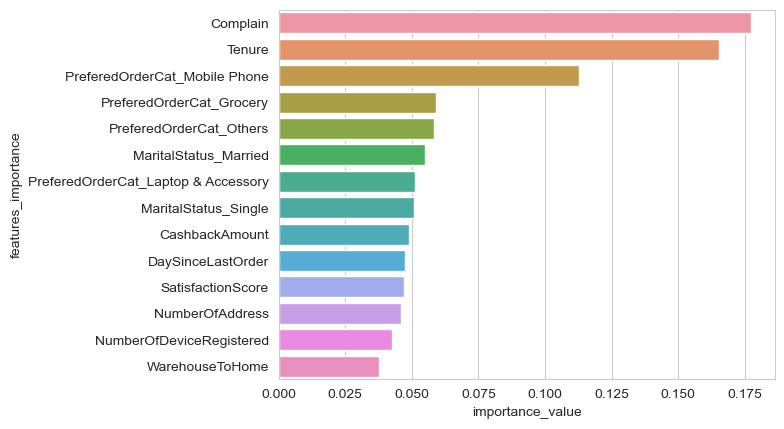

In [ ]:
sns.barplot(data=df_importance.sort_values(
    by='importance_value', 
    ascending=False), 
    x='importance_value', 
    y='features_importance')

Based on the graph above visualizing features that are very important for predicting churn or not, the following insights are obtained:

- Complain: looks very important as a determining factor for churn or not. This can happen, there is a possibility that a customer who has a complaint will determine whether he will churn or not tenure_churn.
With importance value > 0.175
- Tenure: being the second most important feature, in predicting customer loyalty, with an importance value > 0.150
- PreferOrderCat_Mobile_Phone: Being a very significant important feature,
with an importance value > 0.100

Importance is calculated for a single decision tree by the amount that each attribute split point improves the performance measure, weighted by the number of observations the node is responsible for. The performance measure may be the purity (Gini index) used to select the split points or another more specific error function.

https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/

In [663]:
import shap
# ambil model dan data dari pipeline
my_model = randomsearch_xgboost_2nd.best_estimator_[-1]
my_data = randomsearch_xgboost_2nd.best_estimator_[0].transform(X_train)

# define explainer
explainer_shap = shap.TreeExplainer(
    model= my_model,
    data= my_data,
    # feature_dependence= 'independent',
    # model_output= 'probability'
)

# hitung shap value untuk tiap baris di data train
shap_values = explainer_shap.shap_values(my_data)

 96%|=================== | 2501/2611 [00:18<00:00]       

In [674]:
feat = [1] + list(num_cols) + list(onehot_cols) + list(pass_col)

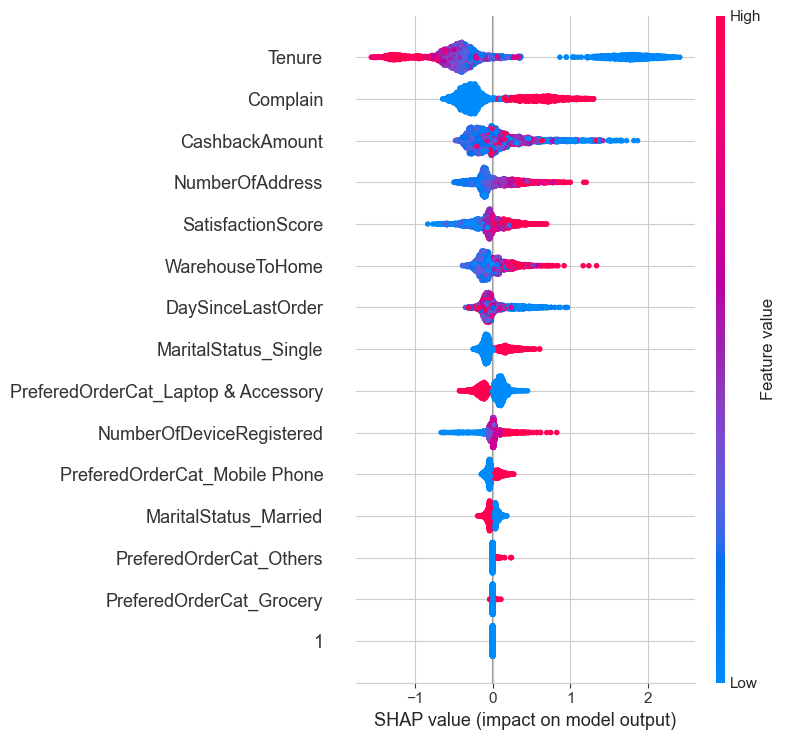

In [675]:
shap.summary_plot(shap_values, my_data, feature_names=feat)

# Summary:

- Based on the above features we can take insights:

     - Complain, on a scale > 0 much more data gathers. This means that we need to pay attention to customers who have complaints because they have a tendency to churn

Text(0.5, 1.0, 'XGBoost After tuning')

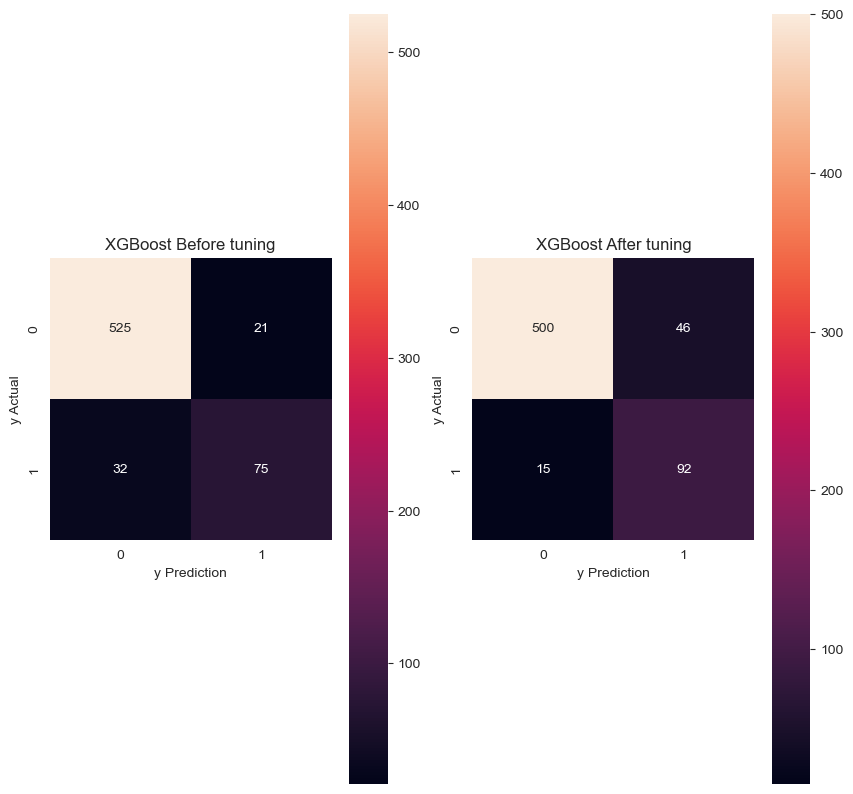

In [735]:
# Model XGBoost after tuning
plt.figure(figsize=(10,10))

plt.subplot (1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_default), annot=True, fmt= '.0f', square=True)
plt.xlabel('y Prediction')
plt.ylabel ('y Actual')
plt. title('XGBoost Before tuning')


# Model XGBoost after tuning
plt.subplot (1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_tuned), annot=True, fmt= '.0f', square=True)
plt.xlabel('y Prediction')
plt.ylabel ('y Actual')
plt. title('XGBoost After tuning')

# Summary:


The purpose of this project is to determine whether a customer will churn (no longer use services) from this bank.

 - FP:
we predict the customer will churn (action --> we give a promotion at a cost of $100), even though it actually doesn't churn
- FN:
we predict that the customer will not churn (action --> we don't pay attention to this customer), even though it actually churns (losing a customer at a cost of $500)




- FP Cost:
$150
-FN Cost:
$675


**Without using ML**

 Before using ML, the company did not know which customers would be churned, so it had to pay for promotions to all customers. Companies do not want to take risks because the cost of losing customers is greater.

 We assume that when a customer is given a promotion, that customer will not churn.

 - Company expenses on promotion (TP+FP+TN+FN):
$150 x 653 = $97,950
- Targeted promotion at churn (TP+FN):
$150 x 107 = $16,050
- This means that the company spends promotional costs in vain on loyal customers:
$ 97,950 - $ 16,050 = $ 81,900

 **By using ML**

 After using ML, companies can predict which customers will churn, so that they can spend on promotions that are more targeted. - Business expenses for false advertising to loyal customers (FP):
$150 x 46 = $6,900
- Companies lose customers due to unpredictable churn (FN).
$675 x 15 = $10,120
- This means that the company has suffered a loss.
$6,900 + $10,120 = $17,020

 **Less reduction after using ML**

 - Loss before using ML:
$81,900
- Loss after using ML:
$17,020
- ML succeeded in reducing the company's loss by 79.21% --> ($81,900 - $17,020) / $81,900 

-----
# Recommendation
  
**Businesses**:

- Customers with a Tenure period of less than 3 months have to be our concern how to retain them by giving promos in this case could be Cashback, Discount, etc.

- Customers with the distance between Warehouse To Home categorized in the range 5 - 15 KM having the likelihood to be churn. Meaning we have to trigger them by using promotions such as free delivery


- Customers who are 9 months from the last day of purchase in DaySinceLastOrder. It is necessary to give promotions to customers with these criteria to stimulate purchase activities, as a retention strategy

- Implementing prediction analysis by developing Machine Learning in order to capture the churn pattern of a customer.



**Machine Learning and Data**:

- There are columns with other features that are directly related to the services that e-commerce companies provide and customer transactions, such as the average number of customer purchases, the number of product purchases per month, the duration of product delivery, and so on

- A model can be improved by tuning hyperparameters with values already obtained as references or by adding additional parameters. 

- There are columns with other features that are directly related to the services that e-commerce companies provide and customer transactions, such as the average number of customer purchases, the number of products purchased per month, the duration of product delivery, and so on. 

- Raise the consumer data to produce predictions that are more accurate. 

- The requirement to equate formats or commercial phrases to prevent meaning bias.

_____
# Save Model Pickle

In [699]:
randomsearch_xgboost_2nd.best_params_

{'transformer__pipe_imputation_scaling__scaler': StandardScaler(),
 'transformer__pipe_imputation_scaling__poly__degree': 1,
 'transformer__pipe_imputation_scaling__imputer': IterativeImputer(),
 'resampler': RandomOverSampler(random_state=0),
 'model__tree_method': 'hist',
 'model__subsample': 0.4,
 'model__n_estimators': 78,
 'model__max_leaves': 434,
 'model__max_depth': 62,
 'model__eta': 0.03,
 'model__colsample_bytree': 0.8999999999999999}

In [715]:
# Pipeline for Missing Values Imputation and Scaler
pipe_imputation_scaling = Pipeline([
    ('imputer',IterativeImputer(random_state=0)), # Pipeline for missing values
    ('poly', PolynomialFeatures(degree=1)),         # Since the feature is less than 10, we use polynomial
    ('scaler', StandardScaler())                     # Pipeline for scaling 
])

transformer = ColumnTransformer([
    ('pipe_imputation_scaling', pipe_imputation_scaling, ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount']),
    ('onehot', OneHotEncoder(drop='first'), ['PreferedOrderCat', 'MaritalStatus'])                  # Transform to OneHot Encoder
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_imputation_scaling',
                                 Pipeline(steps=[('imputer',
                                                  IterativeImputer(random_state=0)),
                                                 ('poly',
                                                  PolynomialFeatures(degree=1)),
                                                 ('scaler', StandardScaler())]),
                                 ['Tenure', 'WarehouseToHome',
                                  'NumberOfDeviceRegistered',
                                  'SatisfactionScore', 'NumberOfAddress',
                                  'DaySinceLastOrder', 'CashbackAmount']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['PreferedOrderCat', 'MaritalStatus'])])

In [730]:
import pickle

model = XGBClassifier(tree_method='hist', subsample=0.4, n_estimators=78, max_leaves=434, max_depth=62, eta=0.03, colsample_bytree=0.8999999999999999)

pipe_model_xg = Pipeline([
    ('transformer',transformer),
    ('sampling',RandomUnderSampler()),
    ('model', model)
])

pipe_model_xg.fit(X_train,y_train)

# Save the pipeline to a file
with open('E-commerce Customer Churn.sav', 'wb') as f:
    pickle.dump(pipe_model_xg, f)


# Testing Model To New Customer 

### Load Pickle File

In [731]:
import pickle

model = XGBClassifier(tree_method='hist', subsample=0.4, n_estimators=78, max_leaves=434, max_depth=62, eta=0.03, colsample_bytree=0.8999999999999999)

pipe_model_xg = Pipeline([
    ('transformer',transformer),
    ('sampling',RandomUnderSampler()),
    ('model', model)
])

pipe_model_xg.fit(X_train,y_train)



# Load the pipeline from the file
with open('E-commerce Customer Churn.sav', 'rb') as f:
    loaded_model = pickle.load(f)


### Creating Example New Customer Set

In [732]:
# Make predictions using the loaded model
df_test = pd.DataFrame({
    'Tenure':[15.0],
    'WarehouseToHome':[29.0],
    'NumberOfDeviceRegistered':[4],
    'PreferedOrderCat': ['Laptop & Accessory'],
    'SatisfactionScore': [3],
    'MaritalStatus':['Single'],
    'NumberOfAddress': [2],
    'Complain':[0],
    'DaySinceLastOrder':[7.000000],
    'CashbackAmount':[143.32],
})

df_test

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32


In [733]:
loaded_model.predict(df_test)

array([0])

Customer is predicted not Churn = 0

-----